<a href="https://colab.research.google.com/github/alemtgetu/602-health/blob/main/Cancer_Tree_mean_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import plot_confusion_matrix as matrix

#Read in Data;  Class 2 for benign 4 for malignant
cancer_data = pd.read_csv('Breast_Cancer_data.csv')
data_filtered = cancer_data[cancer_data['Bare Nuclei'] != '?'] #remove rows with missing data
data_filtered = data_filtered.astype('int64') #converts the object to int64

In [3]:
mal_data = data_filtered[data_filtered['Class'] != 2] #all the malignant tumor data
mal_data.describe() #average Bare Nuclei value is 7.6 which we round to 8

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,2.390000e+02,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.0
mean,1.005121e+06,7.188285,6.577406,6.560669,5.585774,5.326360,7.627615,5.974895,5.857741,2.602510,4.0
std,3.223021e+05,2.437907,2.724244,2.569104,3.196631,2.443087,3.116679,2.282422,3.348876,2.564495,0.0
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.0
25%,8.323965e+05,5.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,3.000000,1.000000,4.0
50%,1.142706e+06,8.000000,6.000000,6.000000,5.000000,5.000000,10.000000,7.000000,6.000000,1.000000,4.0
75%,1.221955e+06,10.000000,10.000000,9.000000,8.000000,6.500000,10.000000,7.000000,9.500000,3.000000,4.0
max,1.371026e+06,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.0


In [4]:
ben_data = data_filtered[data_filtered['Class'] != 4] #all the benign tumor data
ben_data.describe() #average Bare Nuclei value is 1.3 which we round to 1

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,4.440000e+02,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.0
mean,1.115261e+06,2.963964,1.306306,1.414414,1.346847,2.108108,1.346847,2.083333,1.261261,1.065315,2.0
std,7.300359e+05,1.672661,0.855657,0.957031,0.917088,0.877112,1.177848,1.062299,0.954606,0.509738,0.0
min,1.280590e+05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0
25%,1.016064e+06,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.0
50%,1.180677e+06,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.0
75%,1.257846e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.0
max,1.345435e+07,8.000000,9.000000,8.000000,10.000000,10.000000,10.000000,7.000000,8.000000,8.000000,2.0


In [5]:
can_dat = cancer_data.copy(deep = True) #make a deep copy so the orginal data is not overwritten
def myfunc(Bare,Class): #function taht if the Class is 2 make the Bare Nuclei value 1, and if Class is 4 make Bare Nuclei value 8
  if Bare=='?' and Class == 2:
    Bare = 1 #avverage of Class 2, rounded
  elif Bare=='?' and Class == 4:
    Bare = 8 #average of Class 4, rounded
  else:
    Bare = Bare
  return Bare
can_dat['Bare Nuclei'] = can_dat.apply(lambda x: myfunc(x['Bare Nuclei'], x['Class']), axis =1)
can_dat = can_dat.astype('int64') #converts Vare Nuclei class from objects to int64
can_dat.dtypes

id number                      int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [6]:
p = can_dat.copy(deep=True) #make deep copy 
p.describe

<bound method NDFrame.describe of      id number  Clump Thickness  ...  Mitoses  Class
0      1000025                5  ...        1      2
1      1002945                5  ...        1      2
2      1015425                3  ...        1      2
3      1016277                6  ...        1      2
4      1017023                4  ...        1      2
..         ...              ...  ...      ...    ...
694     776715                3  ...        1      2
695     841769                2  ...        1      2
696     888820                5  ...        2      4
697     897471                4  ...        1      4
698     897471                4  ...        1      4

[699 rows x 11 columns]>

In [7]:
labels = p['Class']
features = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses"]
features

['Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses']

In [8]:
#get dataframe of just features
#get all rows and just features columns
X = p.loc[:,features]

In [9]:
#setup plot
import matplotlib.pyplot as plt
print(plt.rcParams.get('figure.figsize'))

[6.0, 4.0]


In [10]:
#setup figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 30
plt.rcParams["figure.figsize"] = fig_size

In [11]:
#set label data as Y
Y = p["Class"]
Y = Y.astype('int')
Y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64

In [12]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
#Finally, create a scorer by calling make_scorer using the score function precision_score and pass the extra parameter pos_label="donated".

#set how many folds/combinations you want
k=5
clf = tree.DecisionTreeClassifier(random_state=0)
#X is all features and Y is all labels, cv performs the split
#scores = cross_val_score(clf, X, Y, cv=k,scoring='precision_macro')
scores = cross_val_score(clf, X, Y, cv=k)

#clf = clf.fit(X, Y)

scores

array([0.9       , 0.93571429, 0.94285714, 0.95      , 0.94244604])

In [13]:
#compute the mean accuracy, and the margin of error at 95% confidence interval. I.e., we are 95% confident that the mean
#accuracy is 68% +- 2 standard deviations/sqrt(k) (the more deviations the more confident we can be, widening the beam/net).
print("Accuracy = %0.2f%% (+/- %0.2f%%) @95%%" % (scores.mean()*100, (scores.std() * 1.96)/k**(1/2)*100))
scores.mean()

Accuracy = 93.42% (+/- 1.55%) @95%


0.9342034943473794

In [14]:
#get sorted labels for plot 
import numpy as np
sorted = labels.unique()
sorted = np.sort(sorted)
sorted = list(map(str, sorted))
sorted

['2', '4']

env: PYTHONBREAKPOINT=0
model score =  0.9428571428571428
Average K-Fold Score : 0.9342034943473794


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[454   4]
 [  4 237]]
model score =  0.9214285714285714
Average K-Fold Score : 0.9342034943473794


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[451   7]
 [  4 237]]
model score =  0.9428571428571428
Average K-Fold Score : 0.9342034943473794


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[455   3]
 [  5 236]]
model score =  0.9428571428571428
Average K-Fold Score : 0.9342034943473794


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[455   3]
 [  5 236]]
model score =  0.9712230215827338
Average K-Fold Score : 0.9342034943473794


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[458   0]
 [  4 237]]


<Figure size 2160x2160 with 0 Axes>

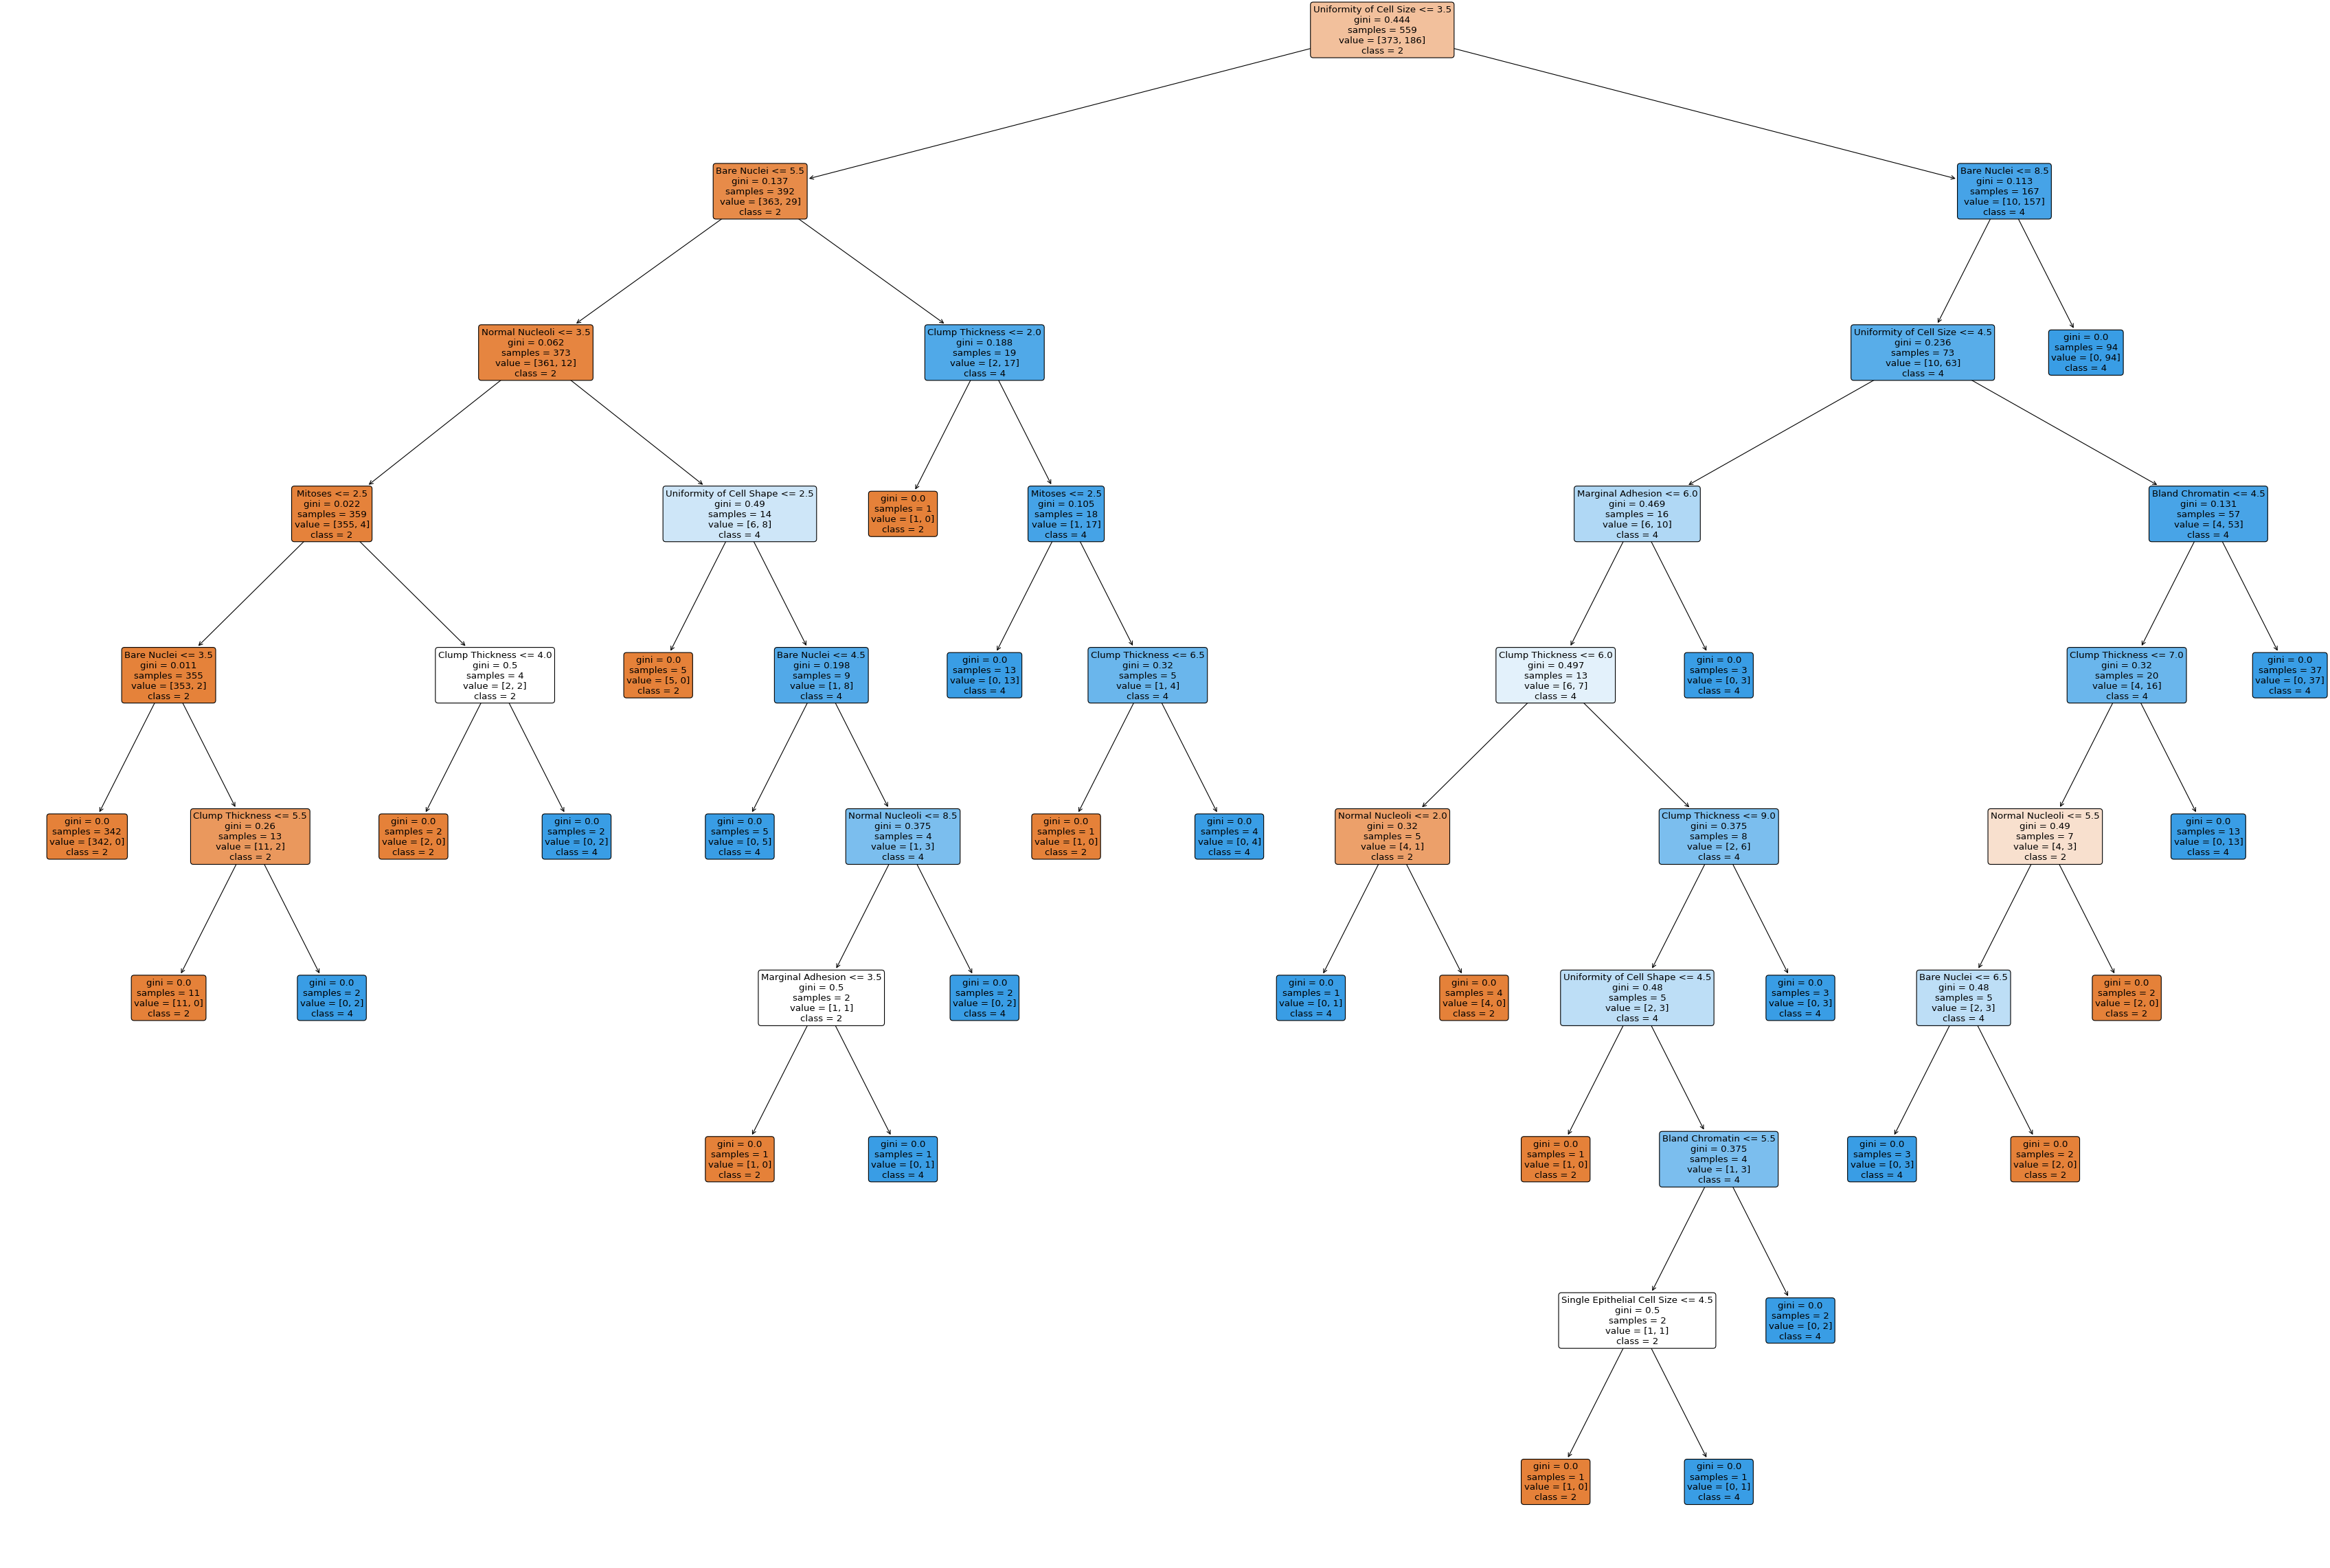

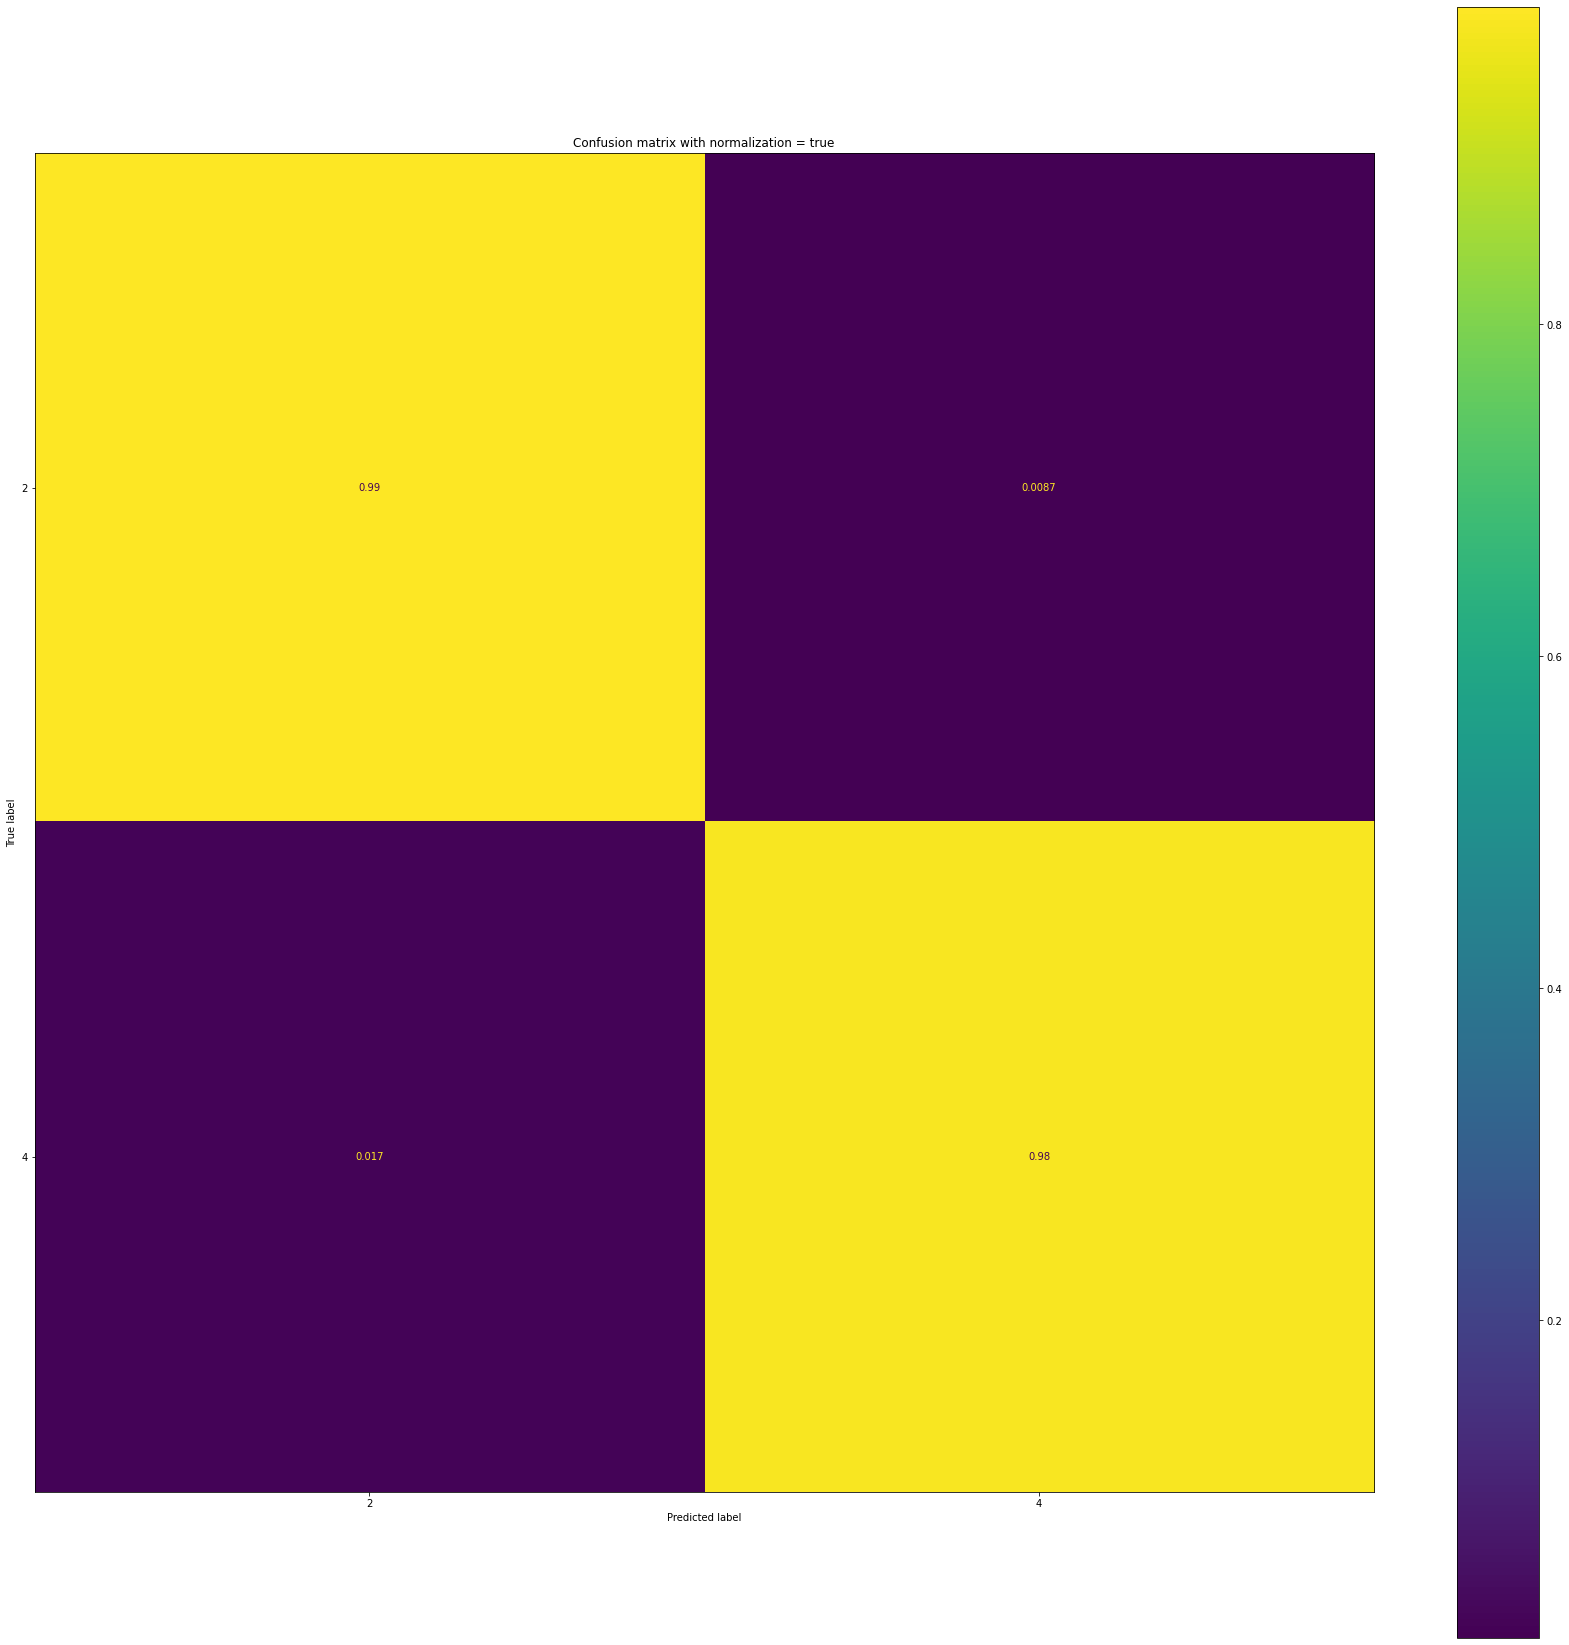

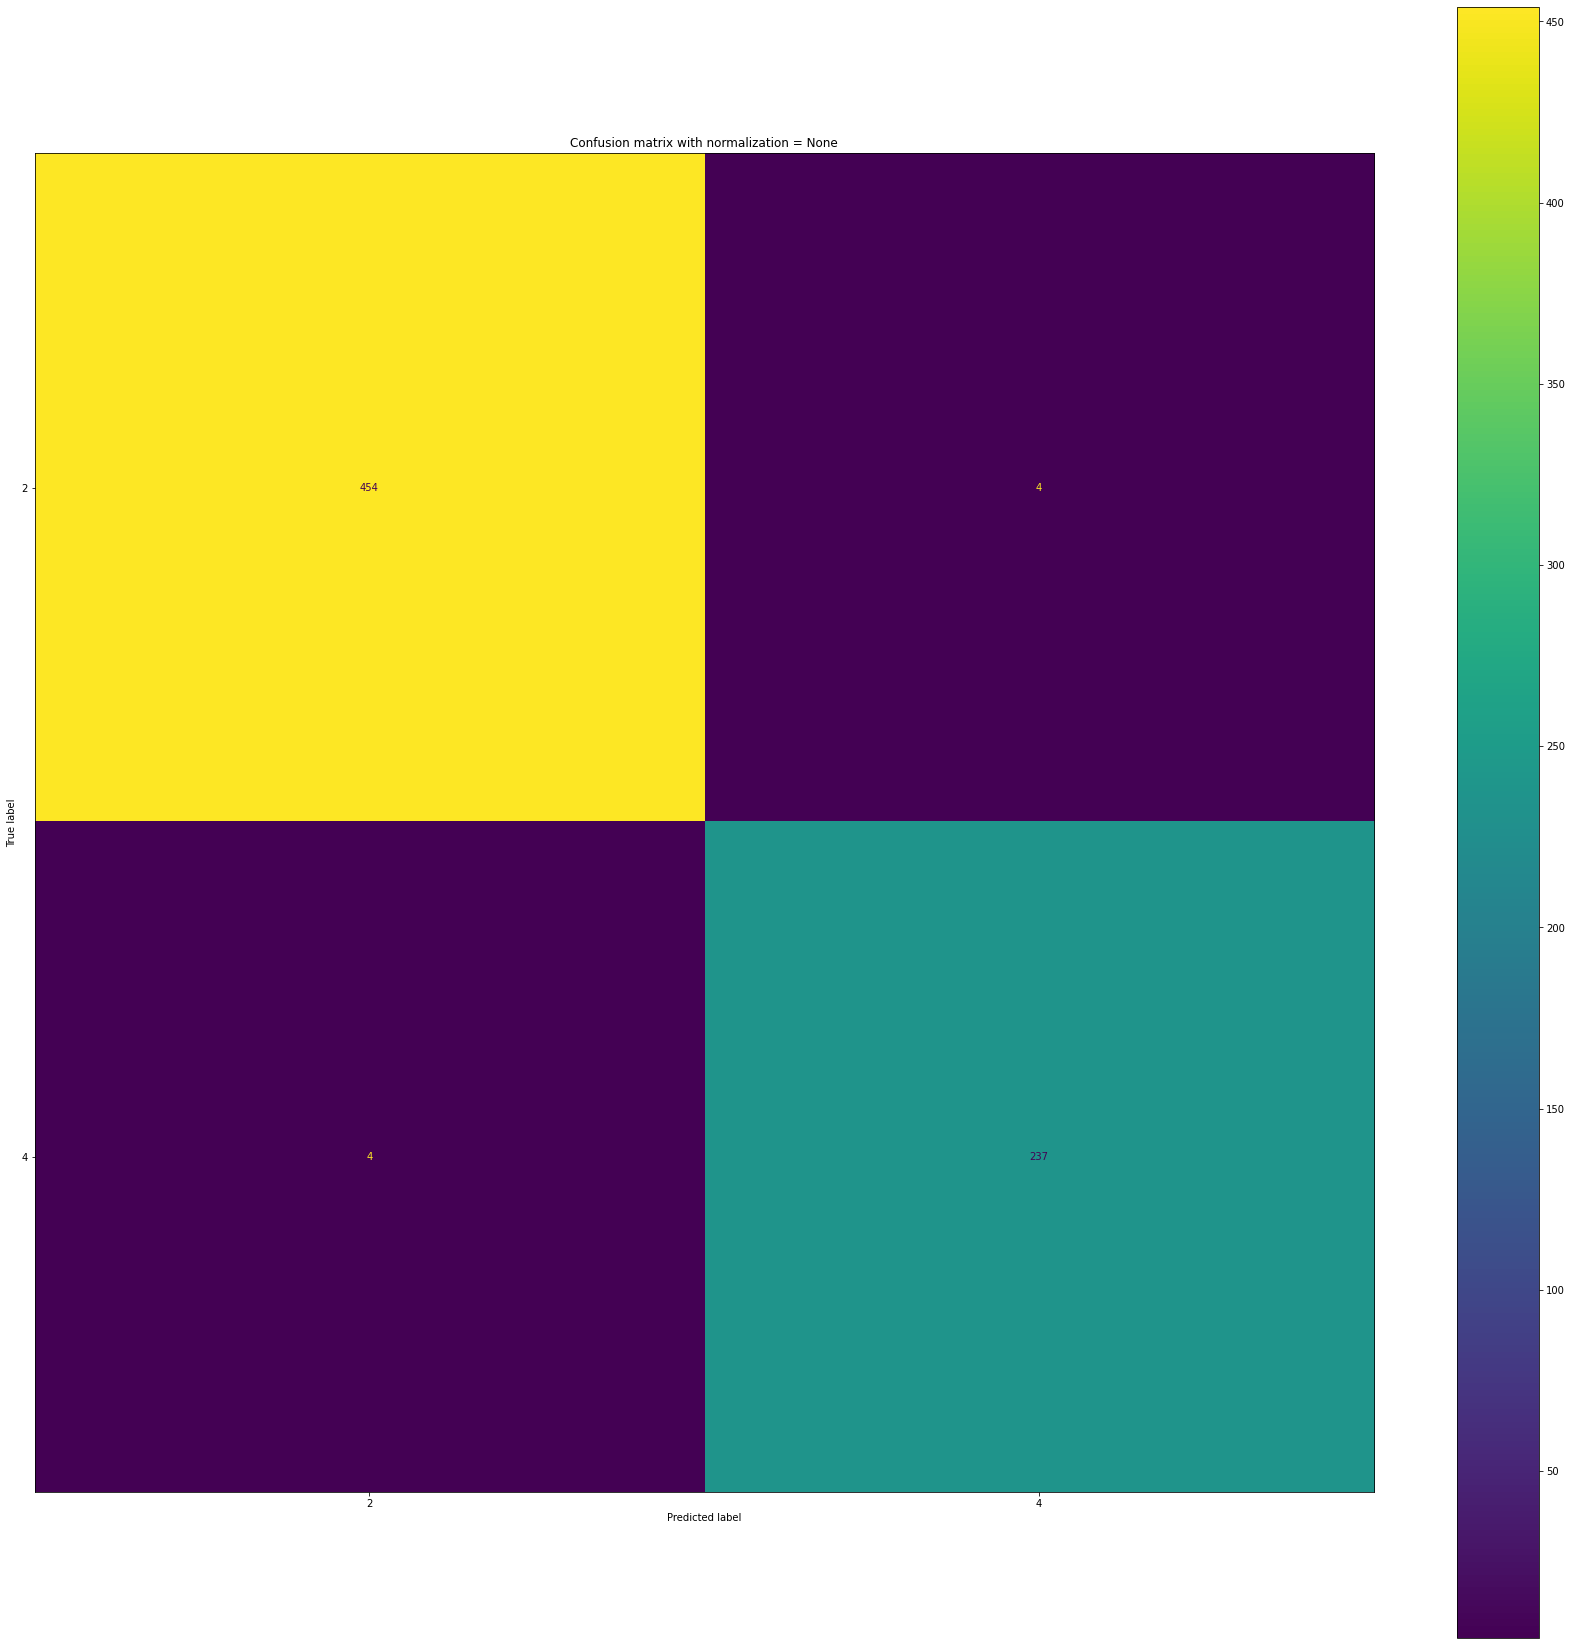

<Figure size 2160x2160 with 0 Axes>

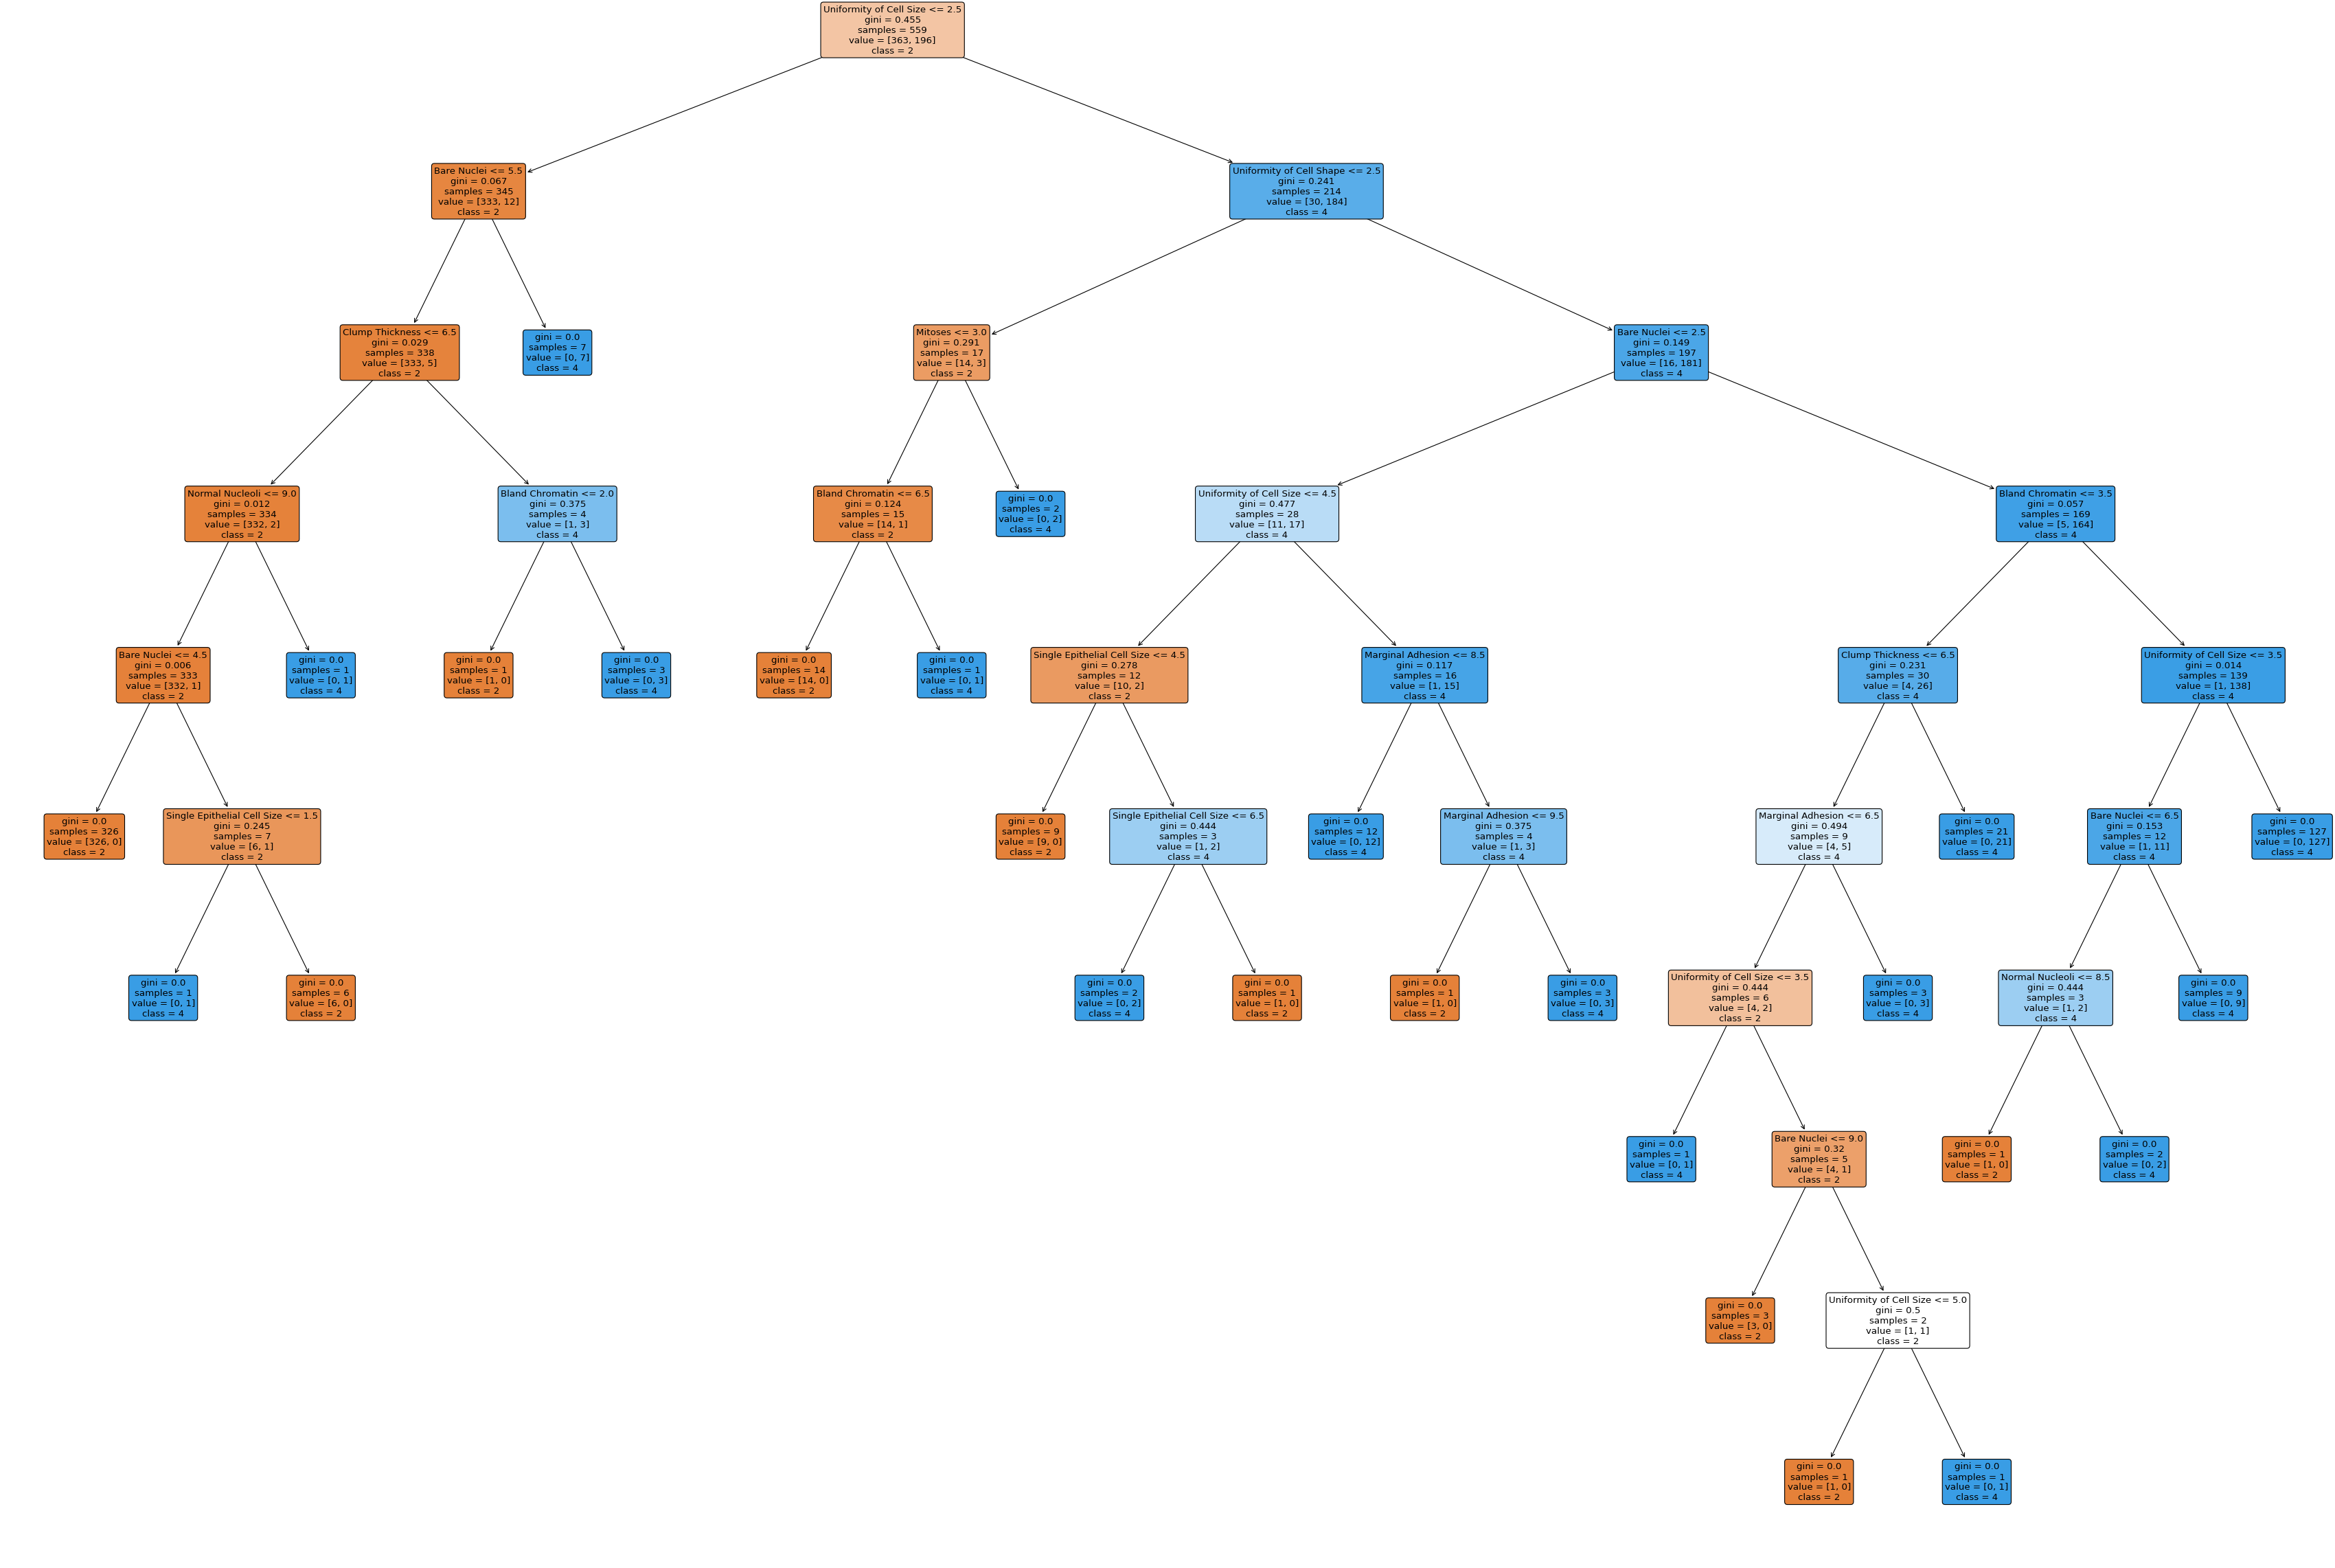

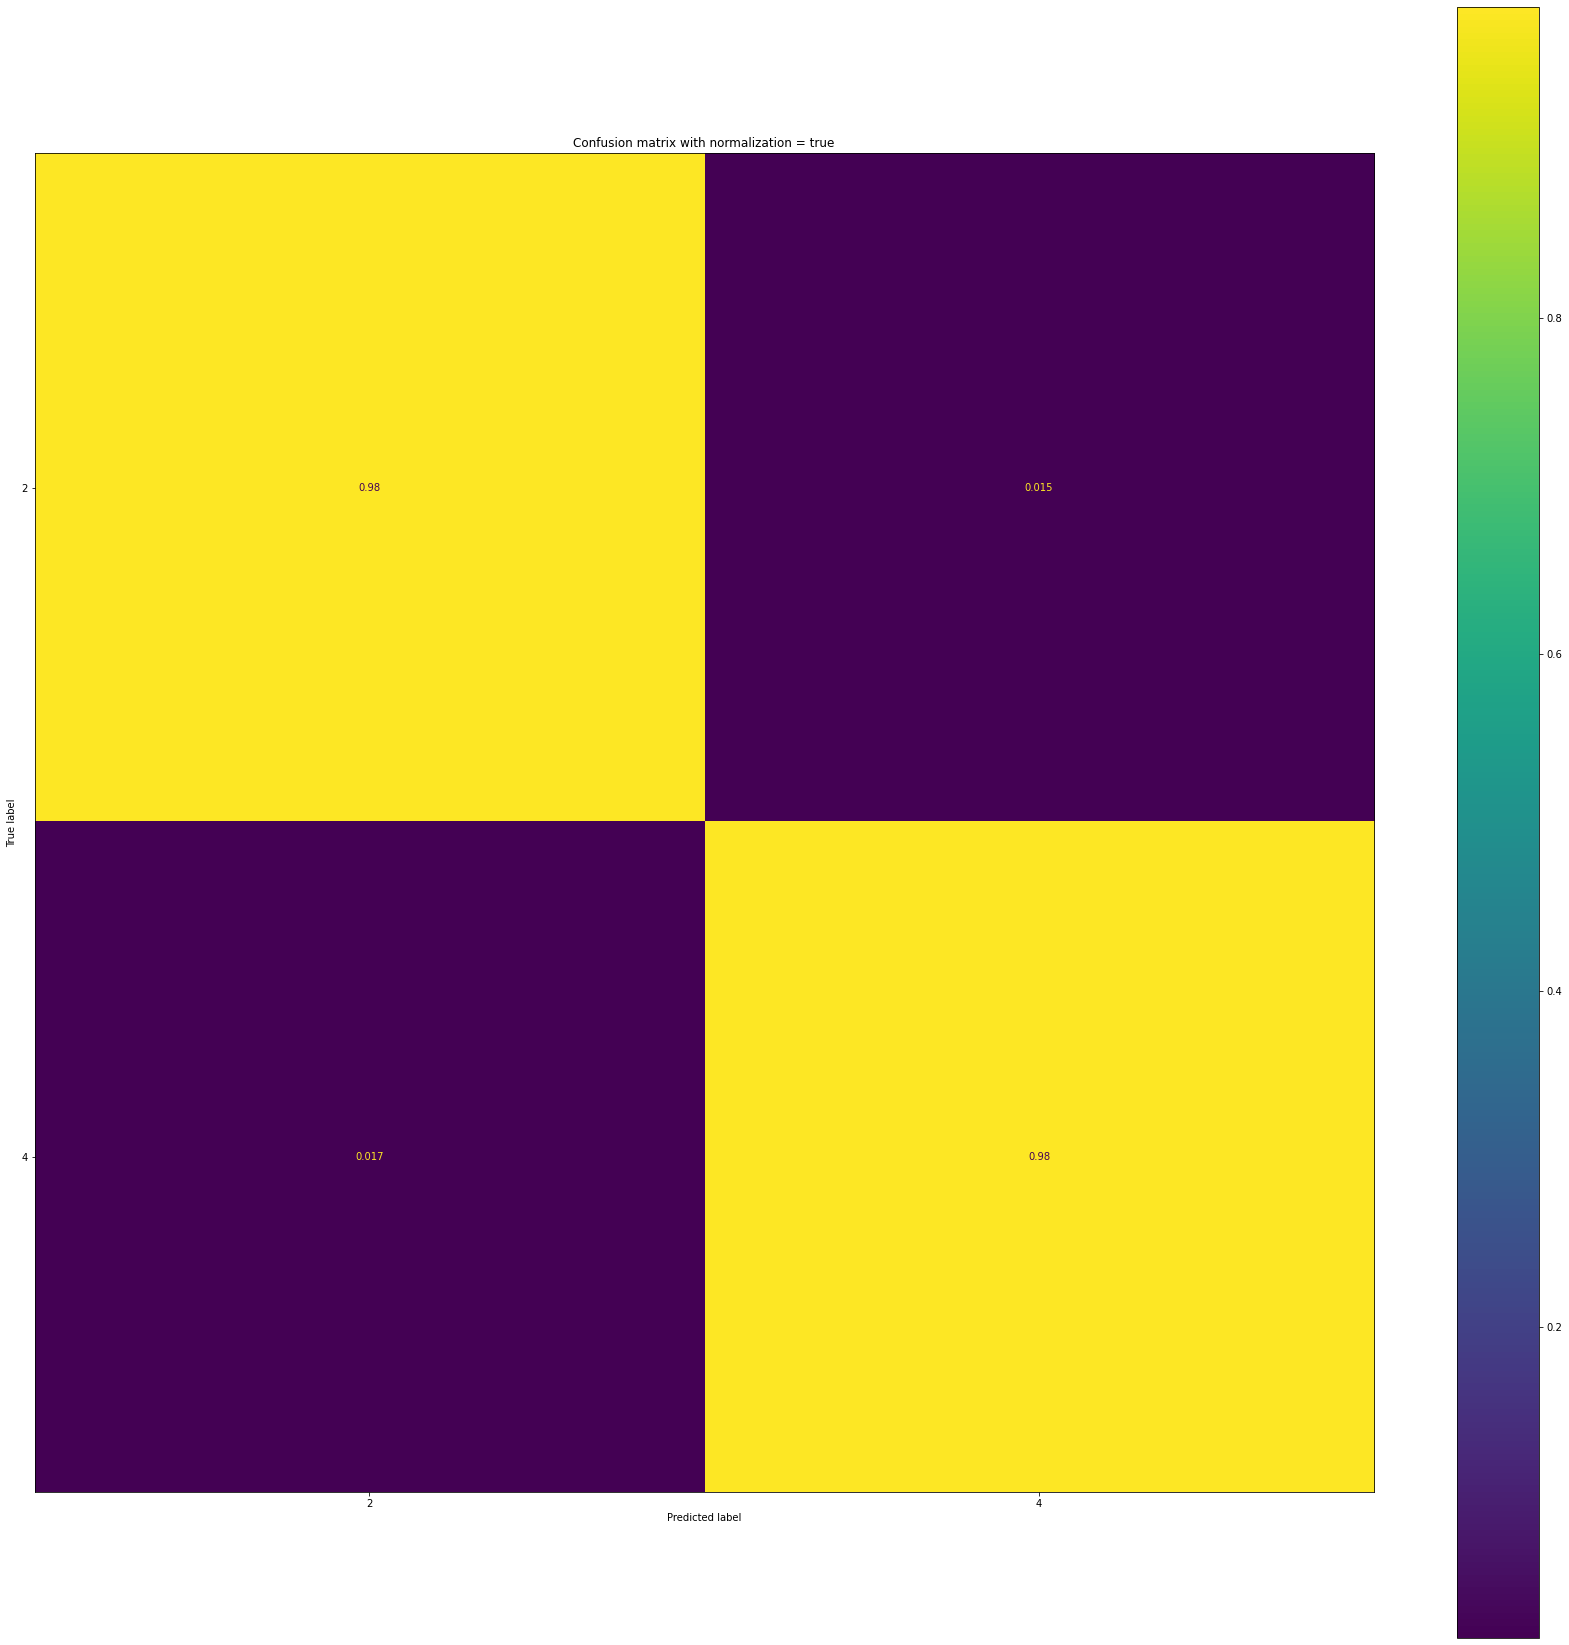

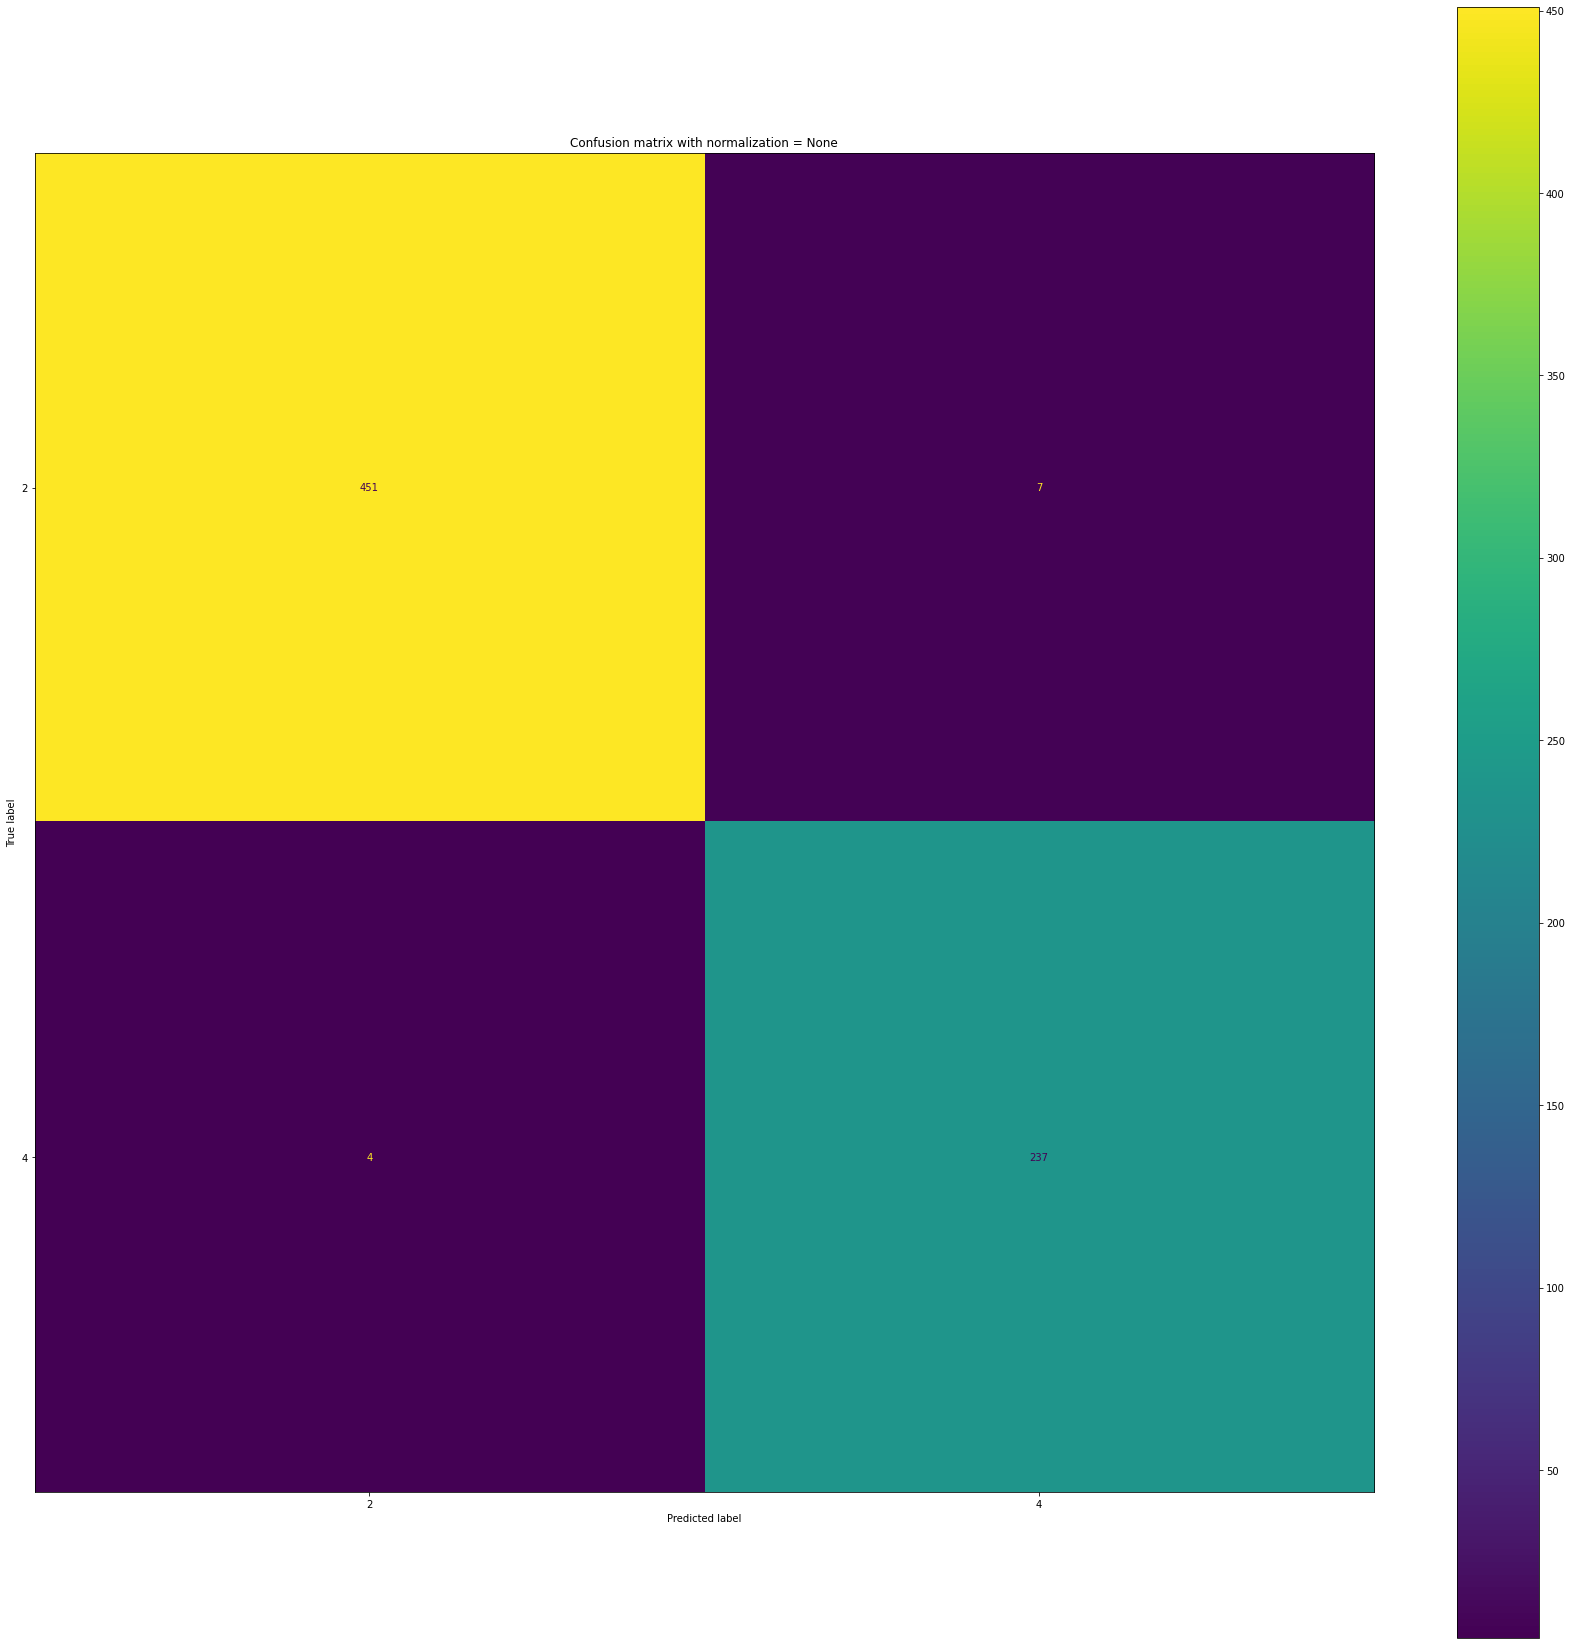

<Figure size 2160x2160 with 0 Axes>

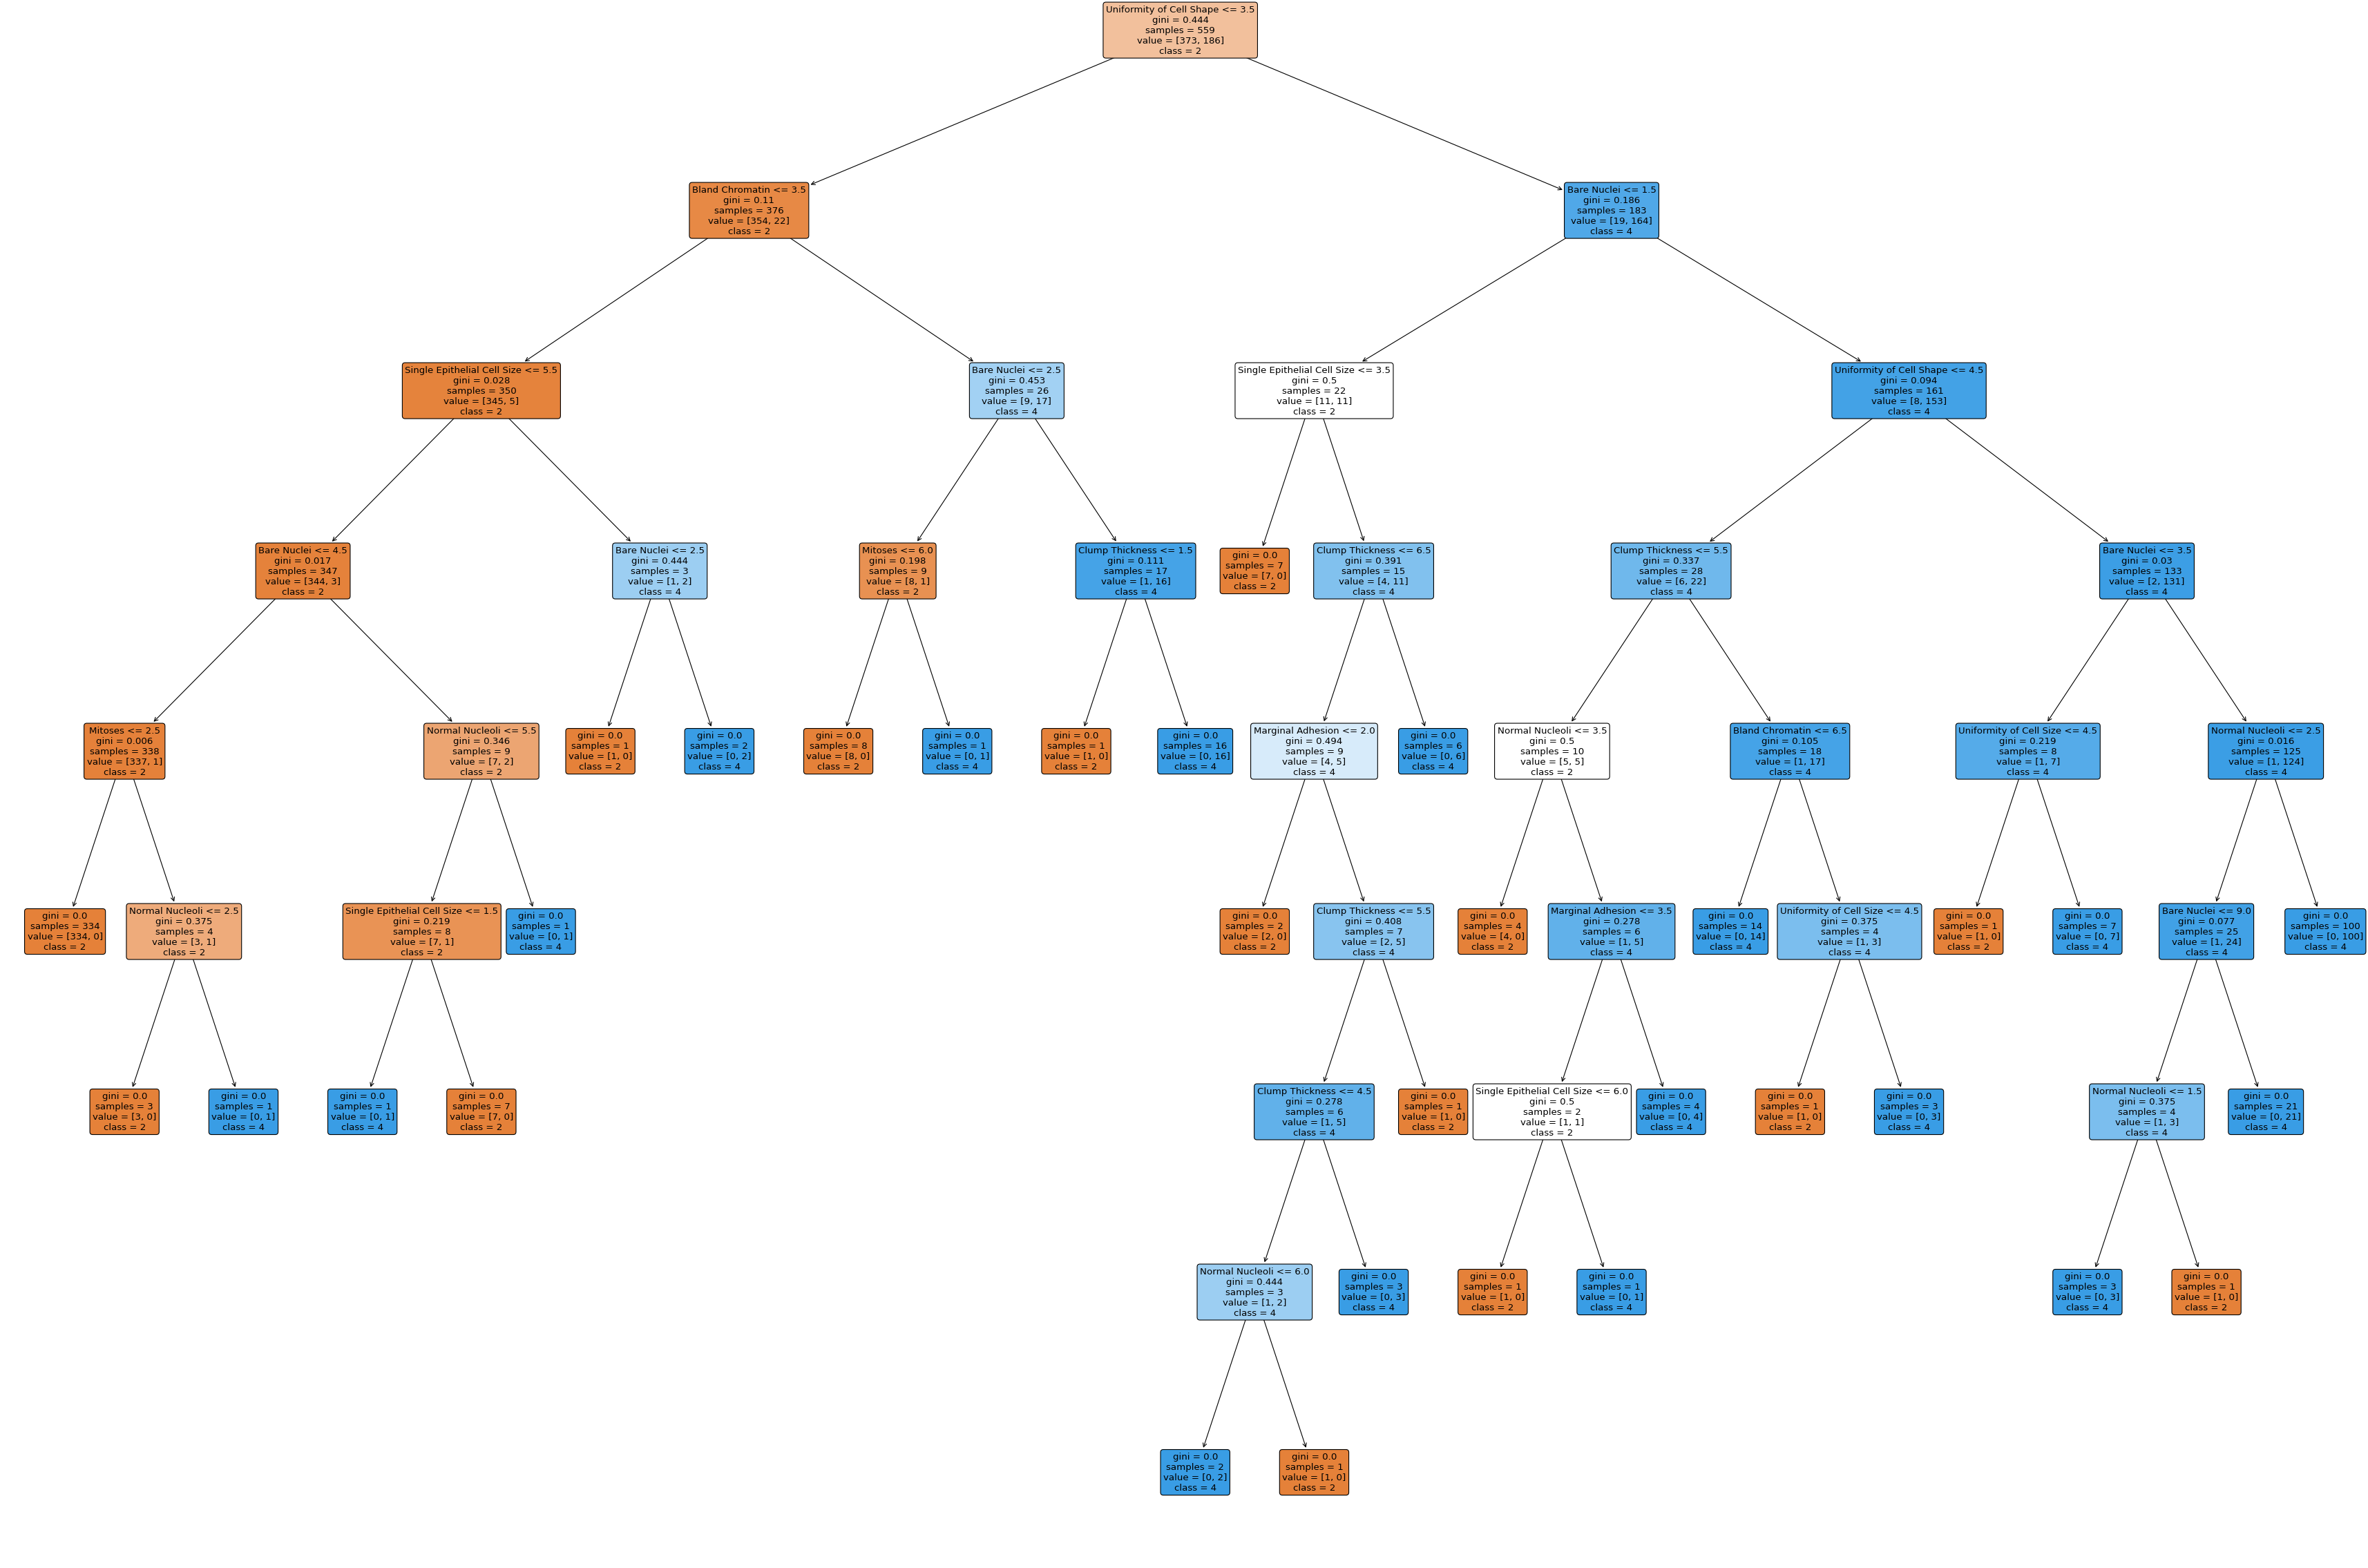

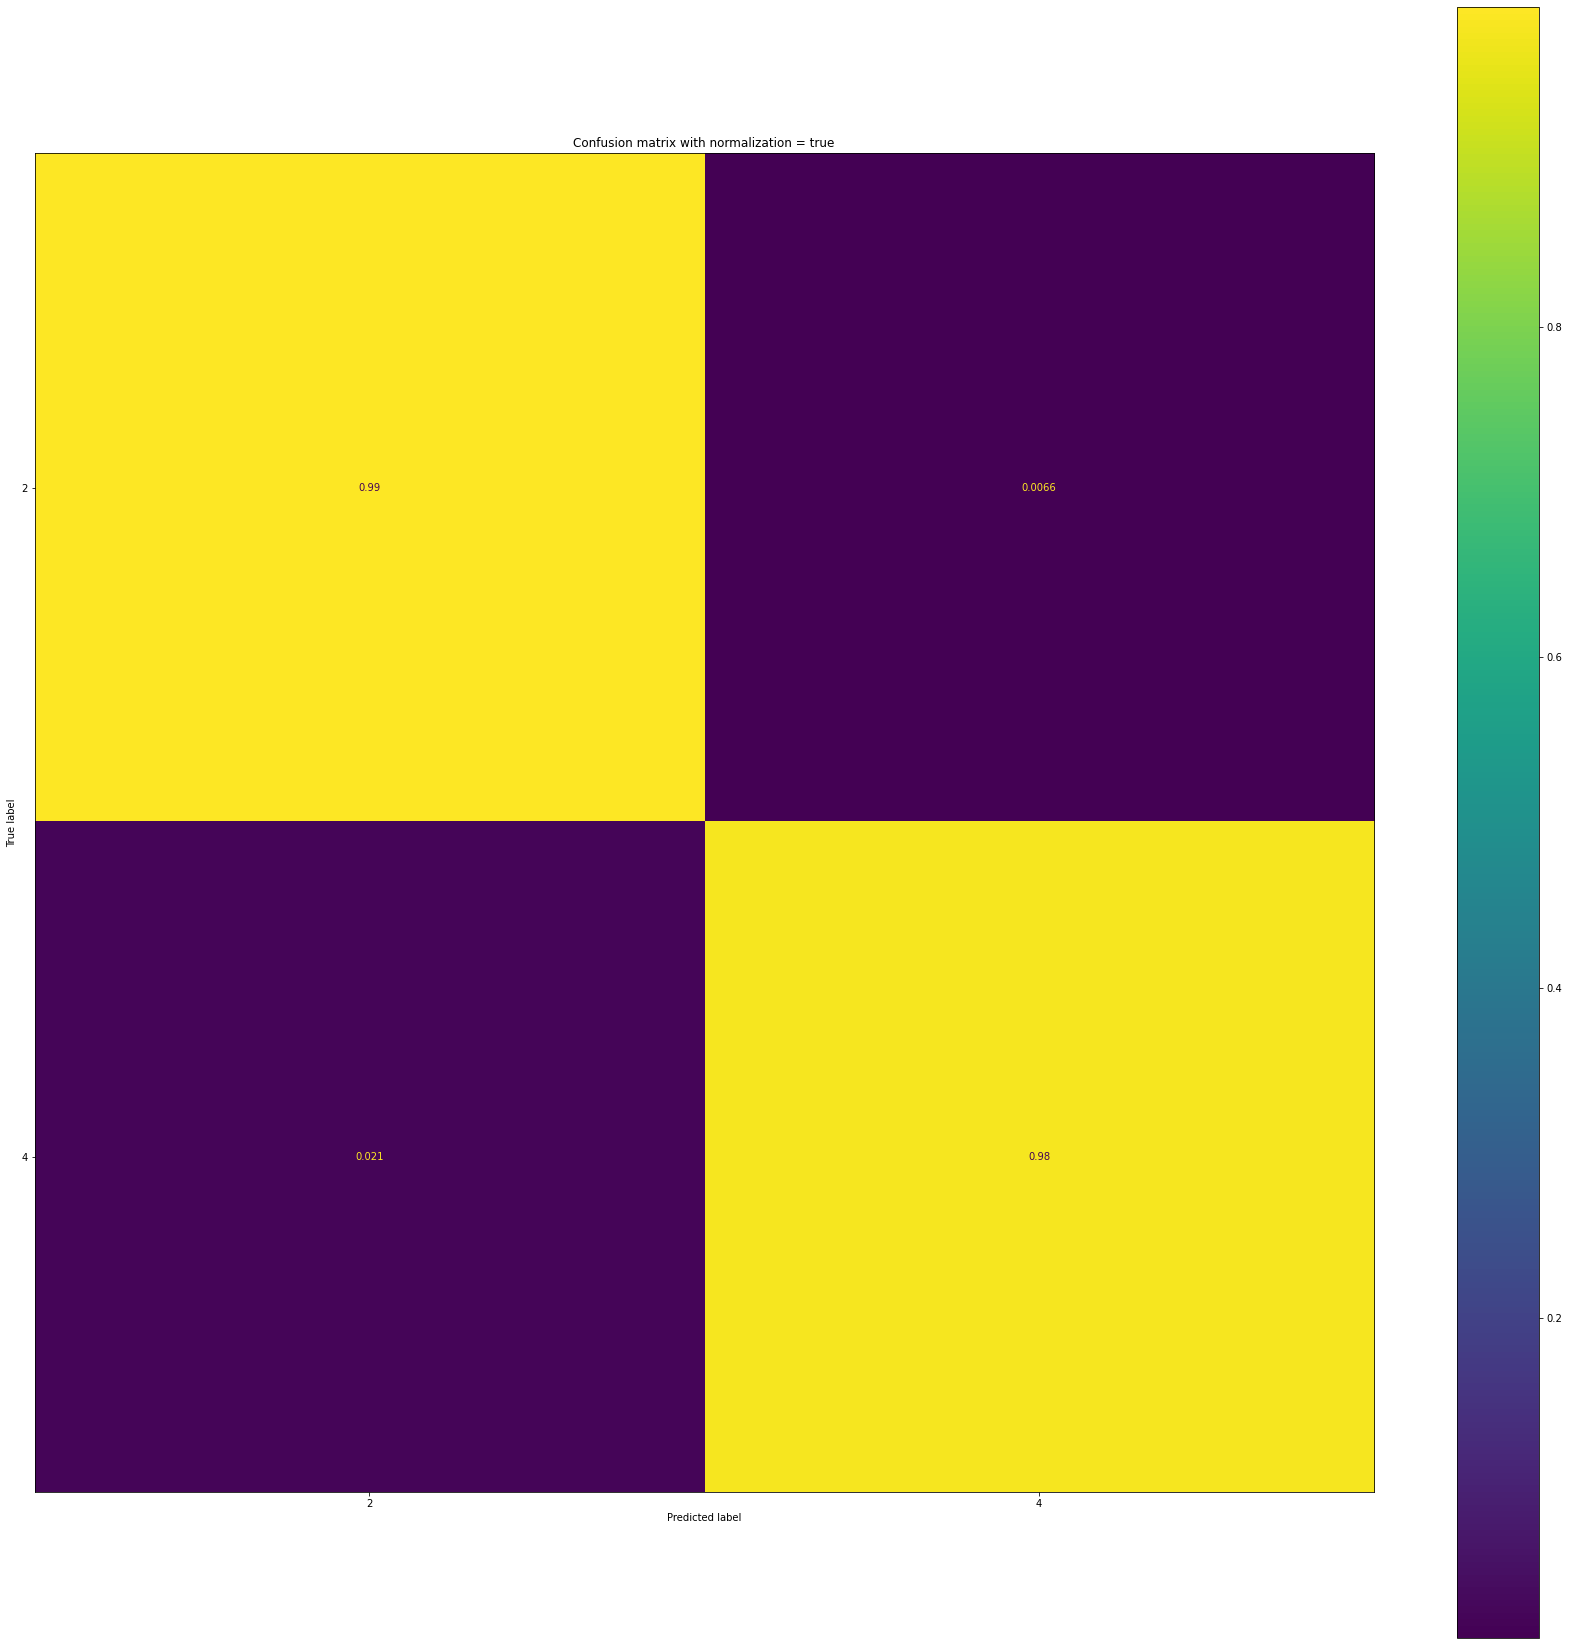

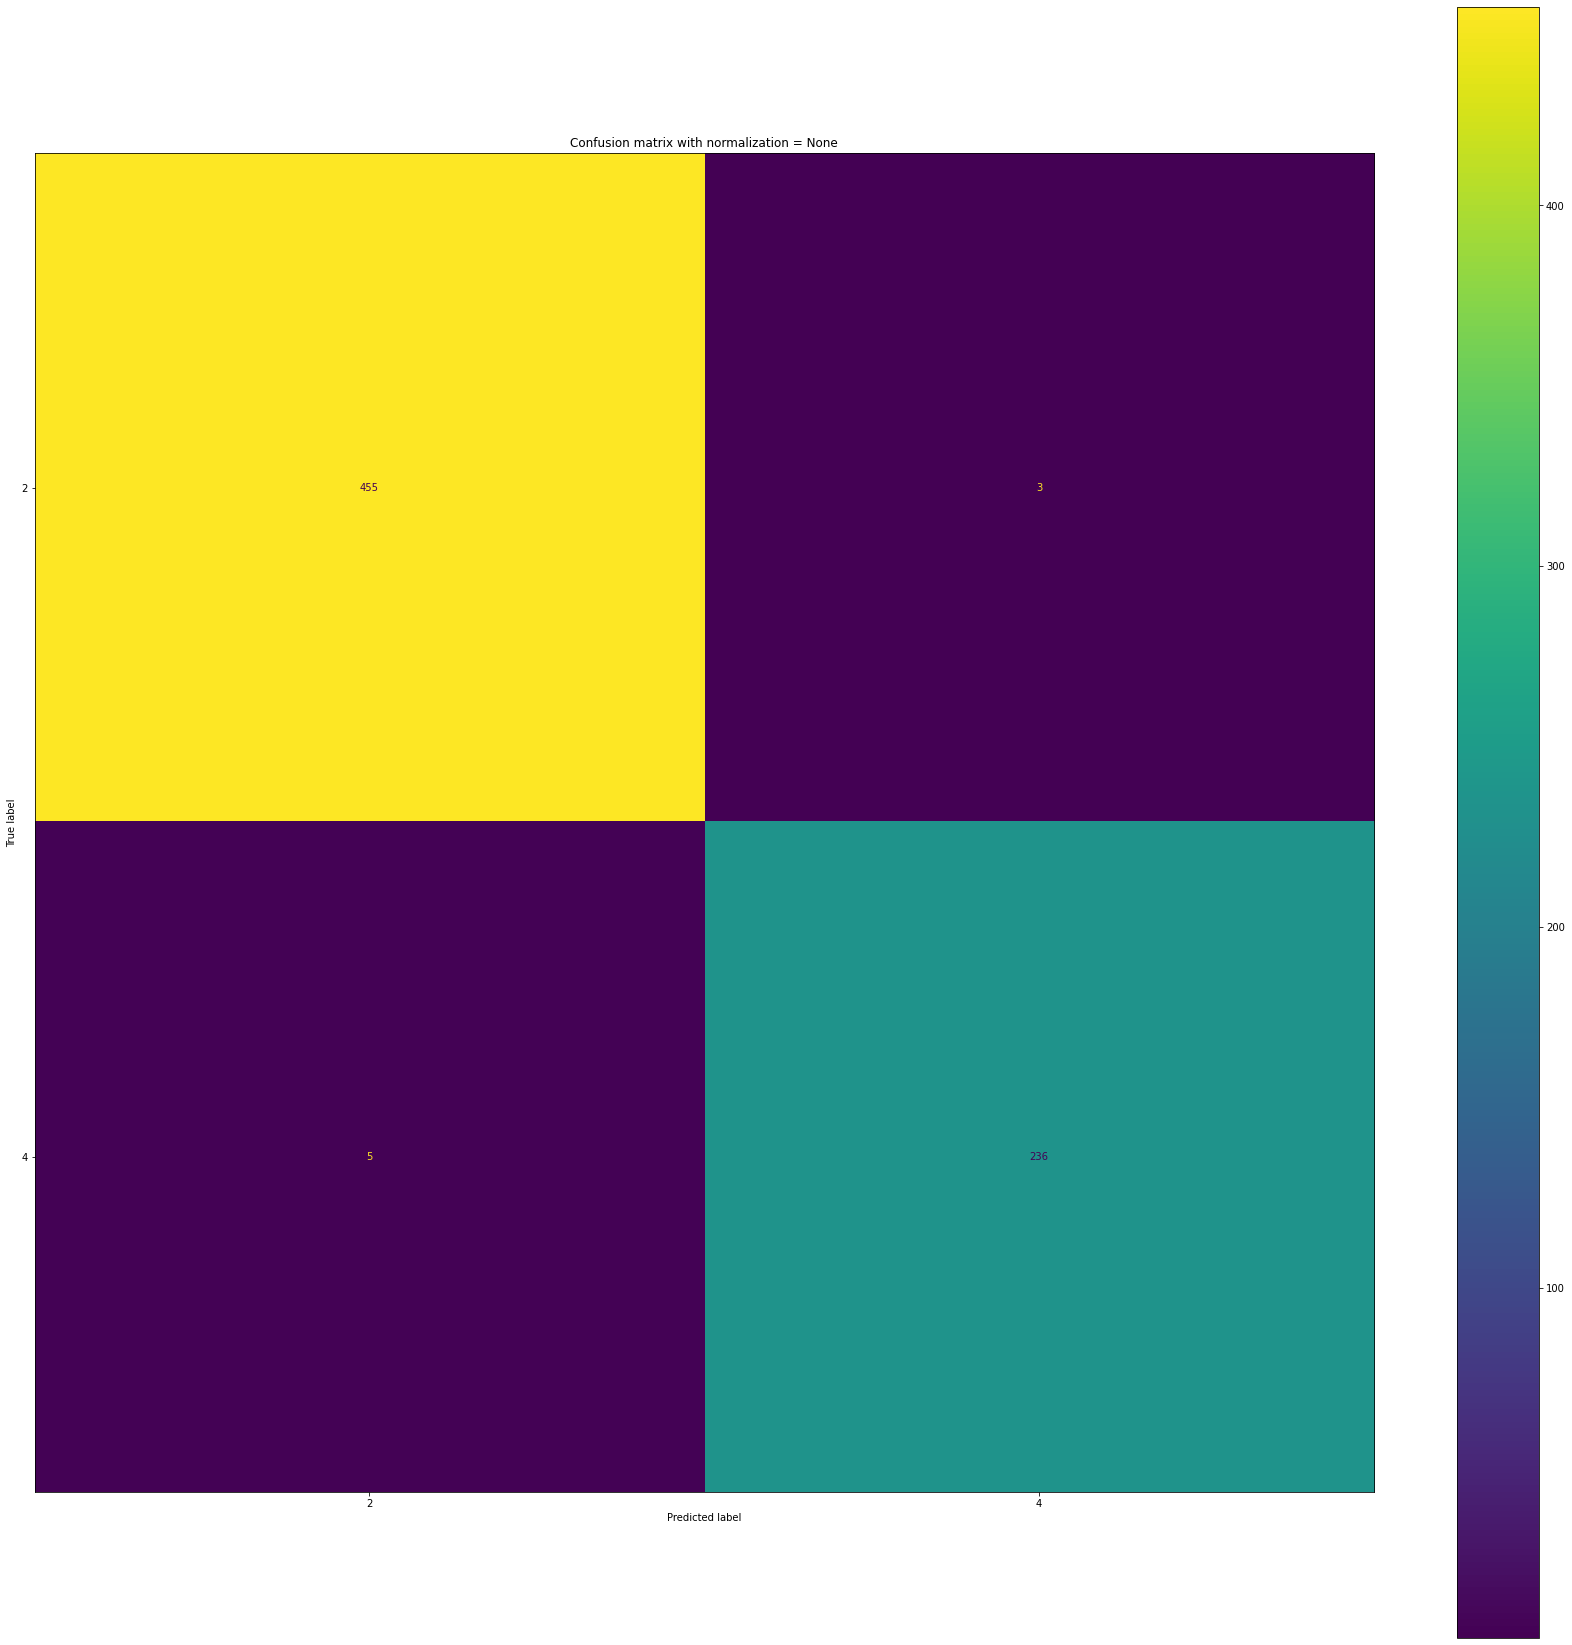

<Figure size 2160x2160 with 0 Axes>

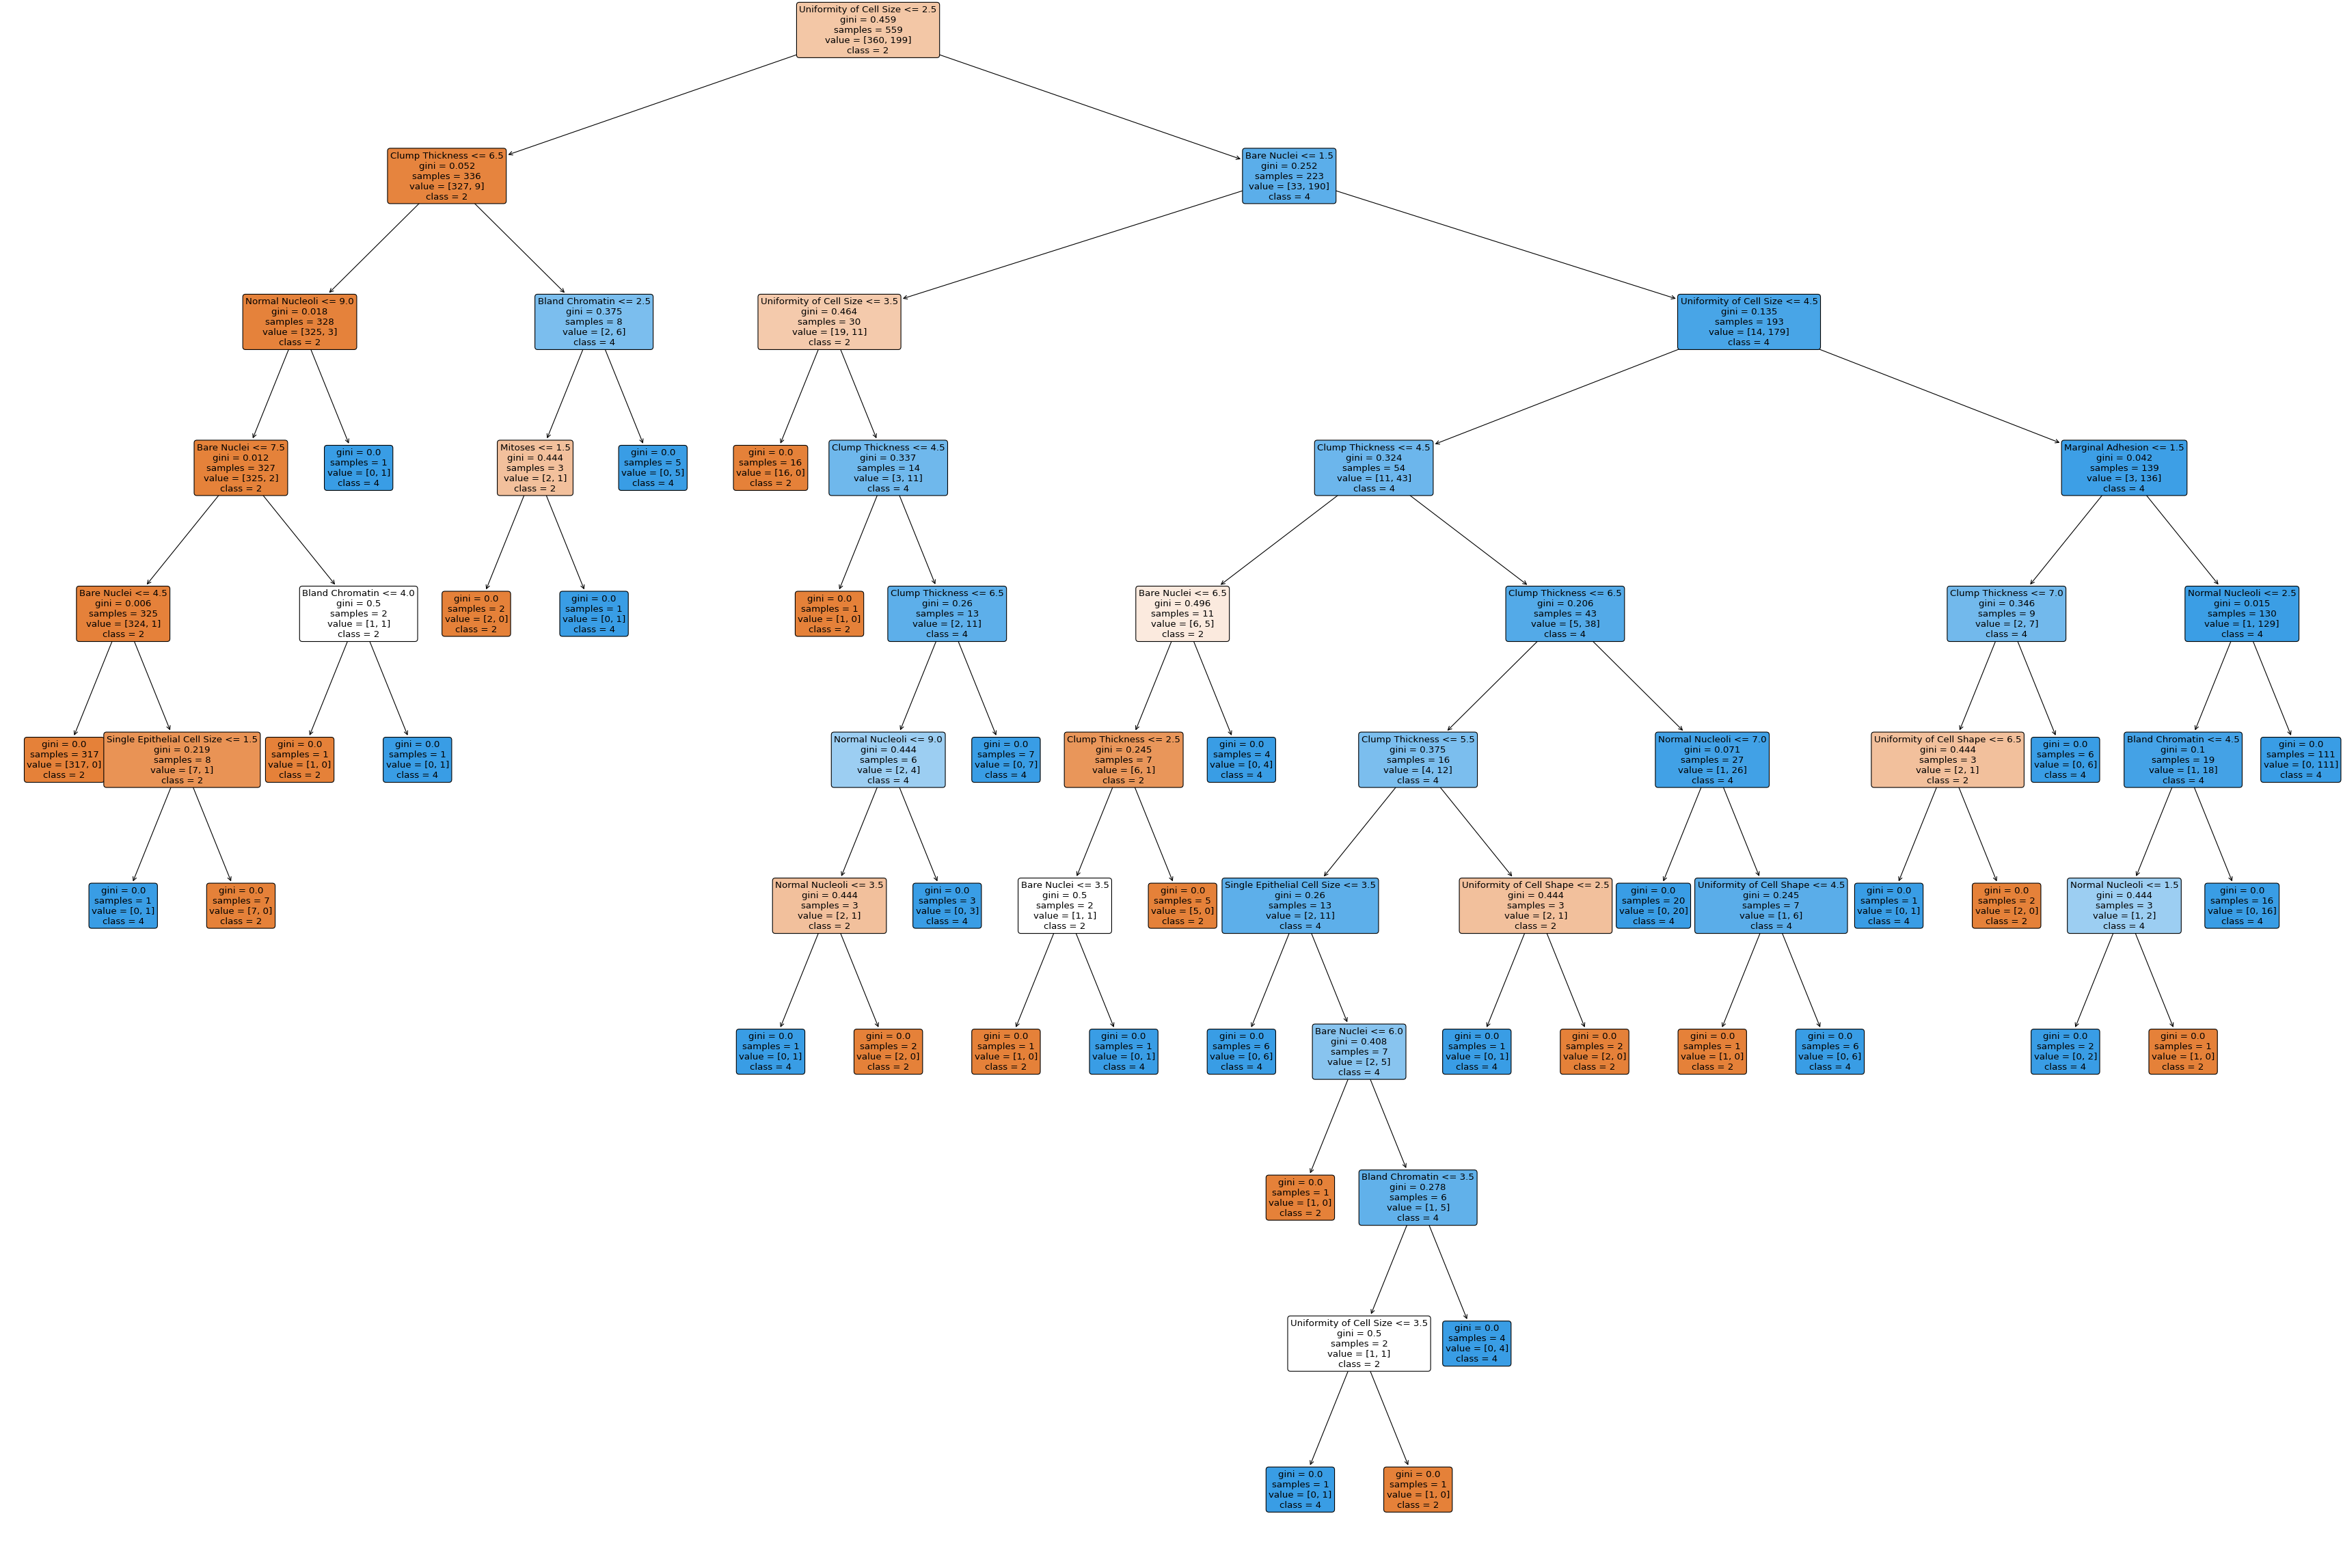

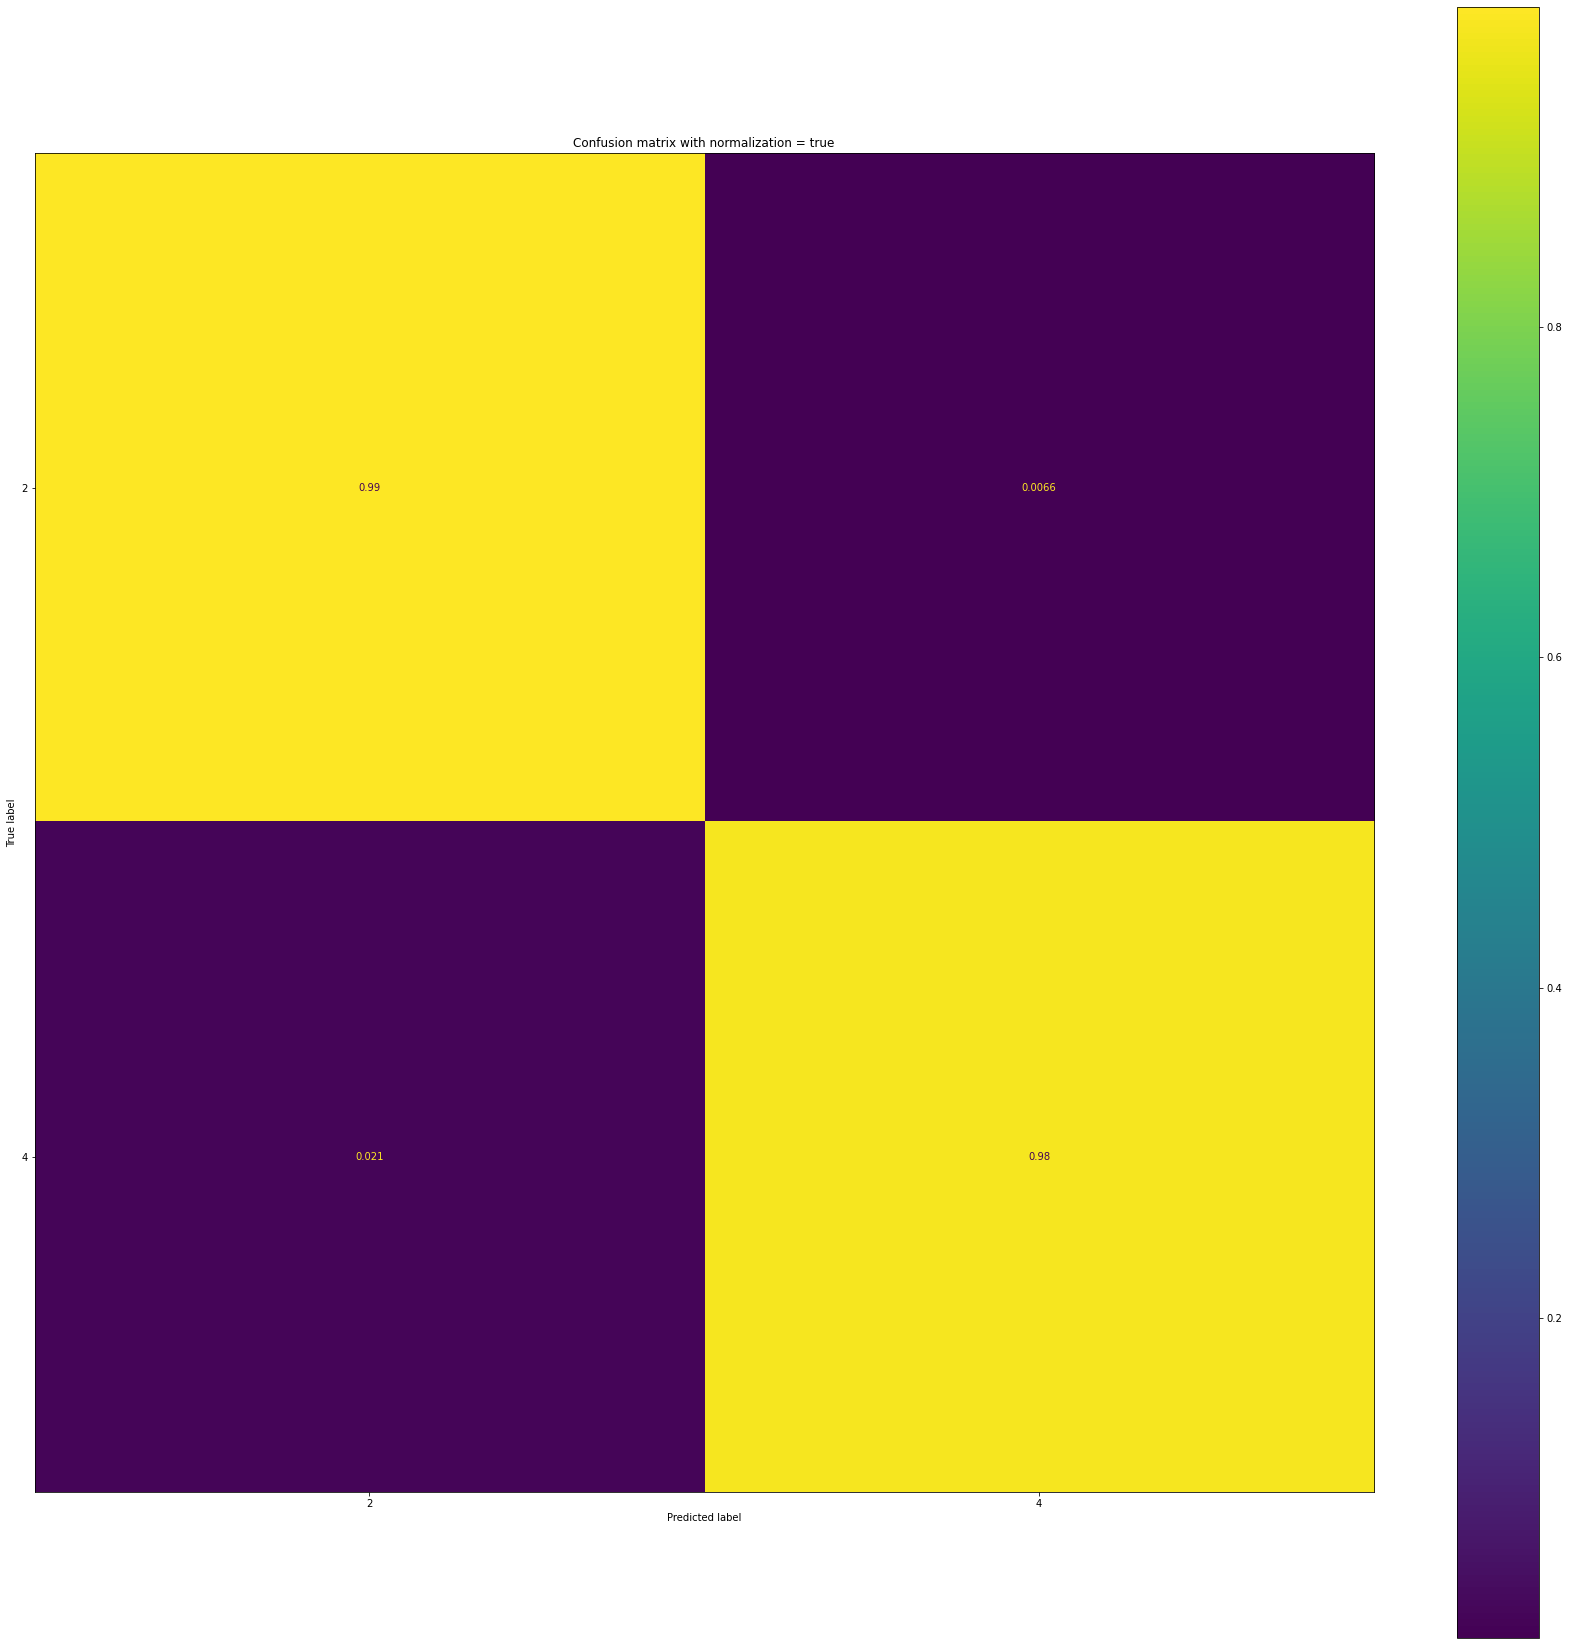

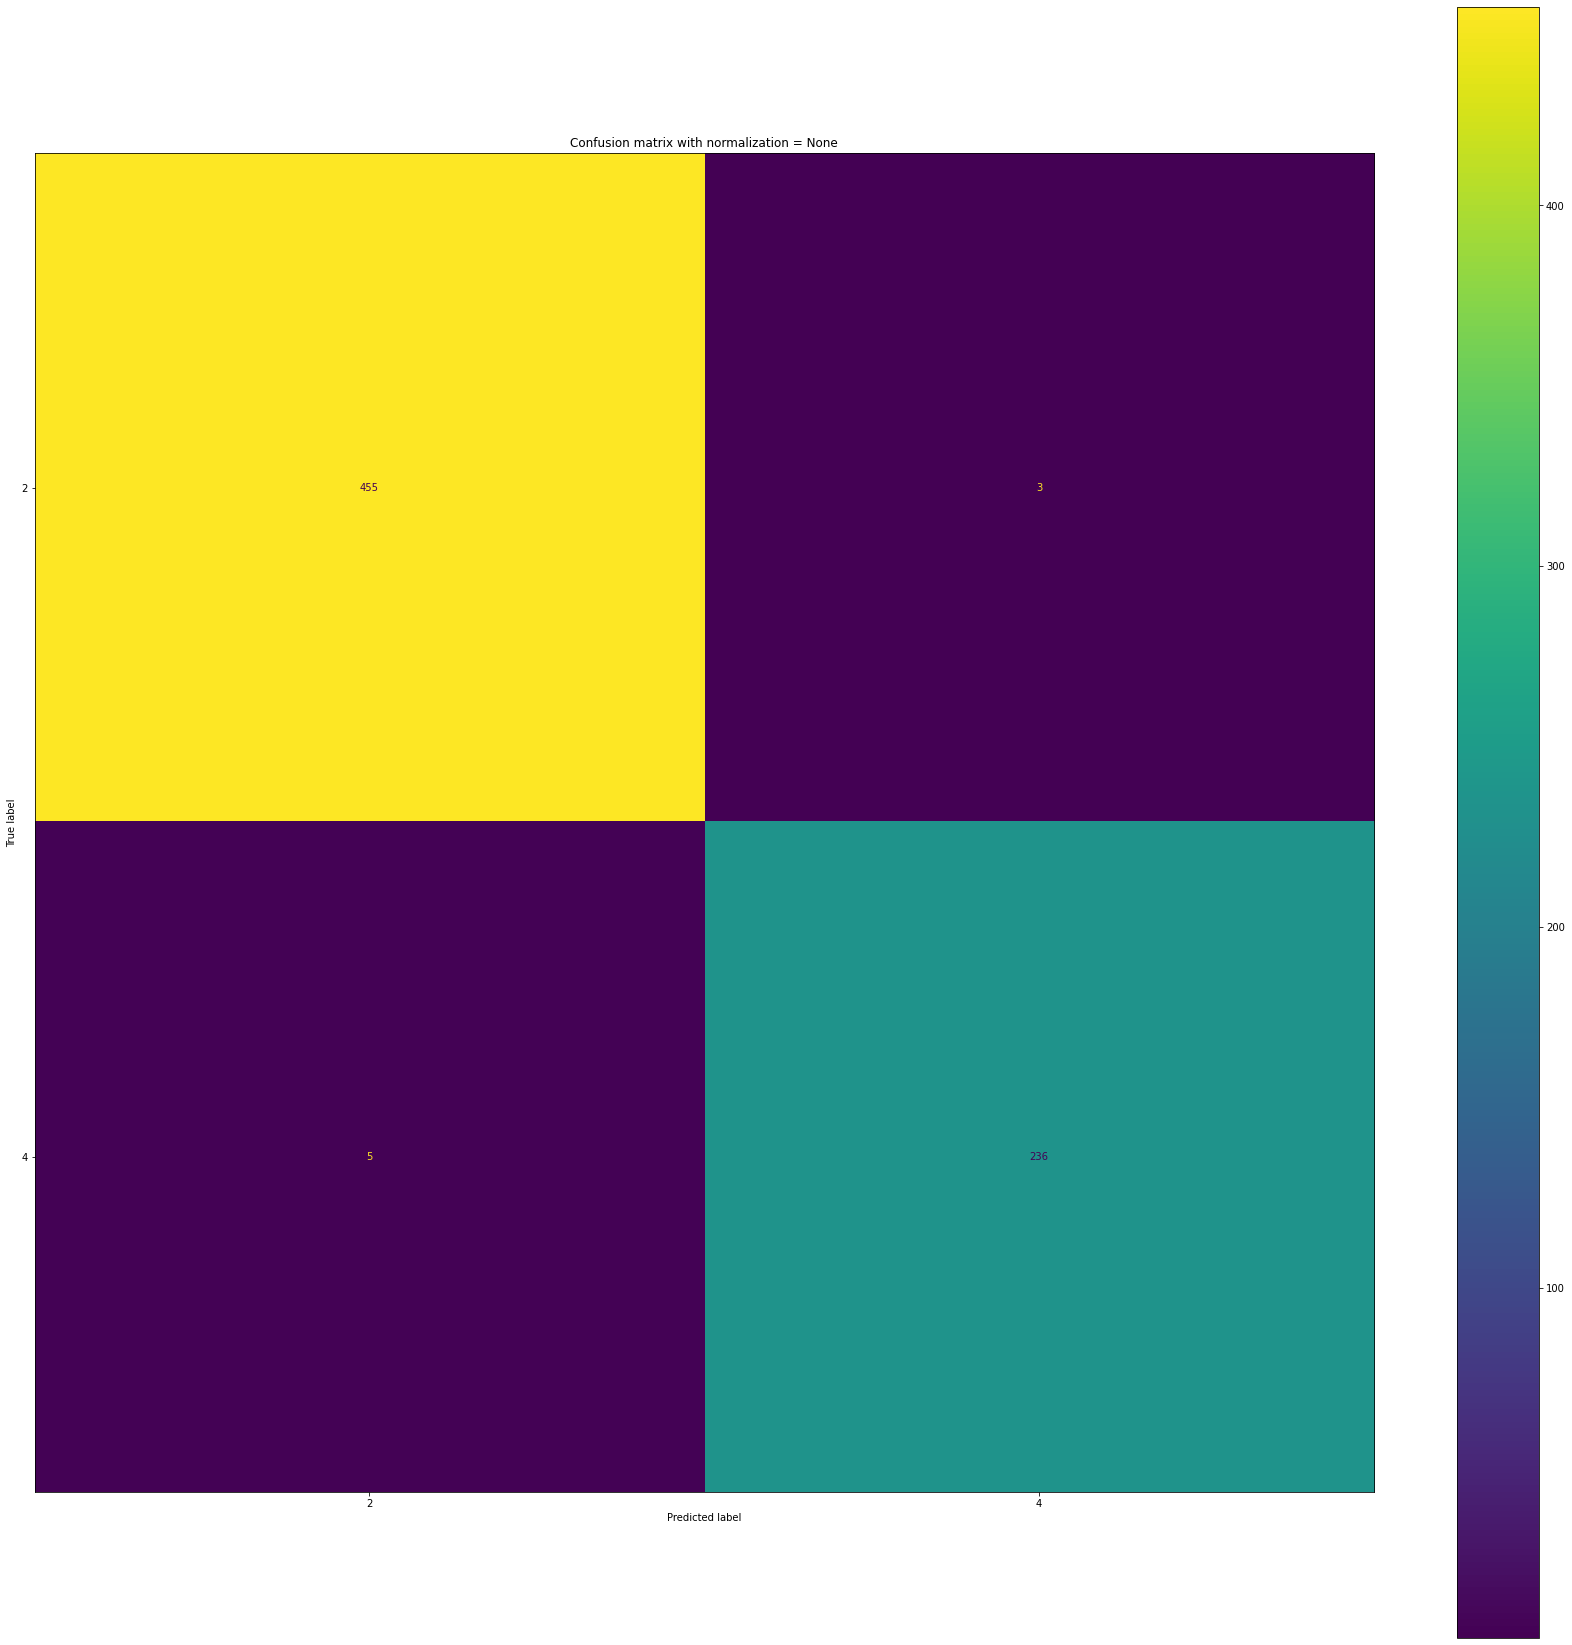

<Figure size 2160x2160 with 0 Axes>

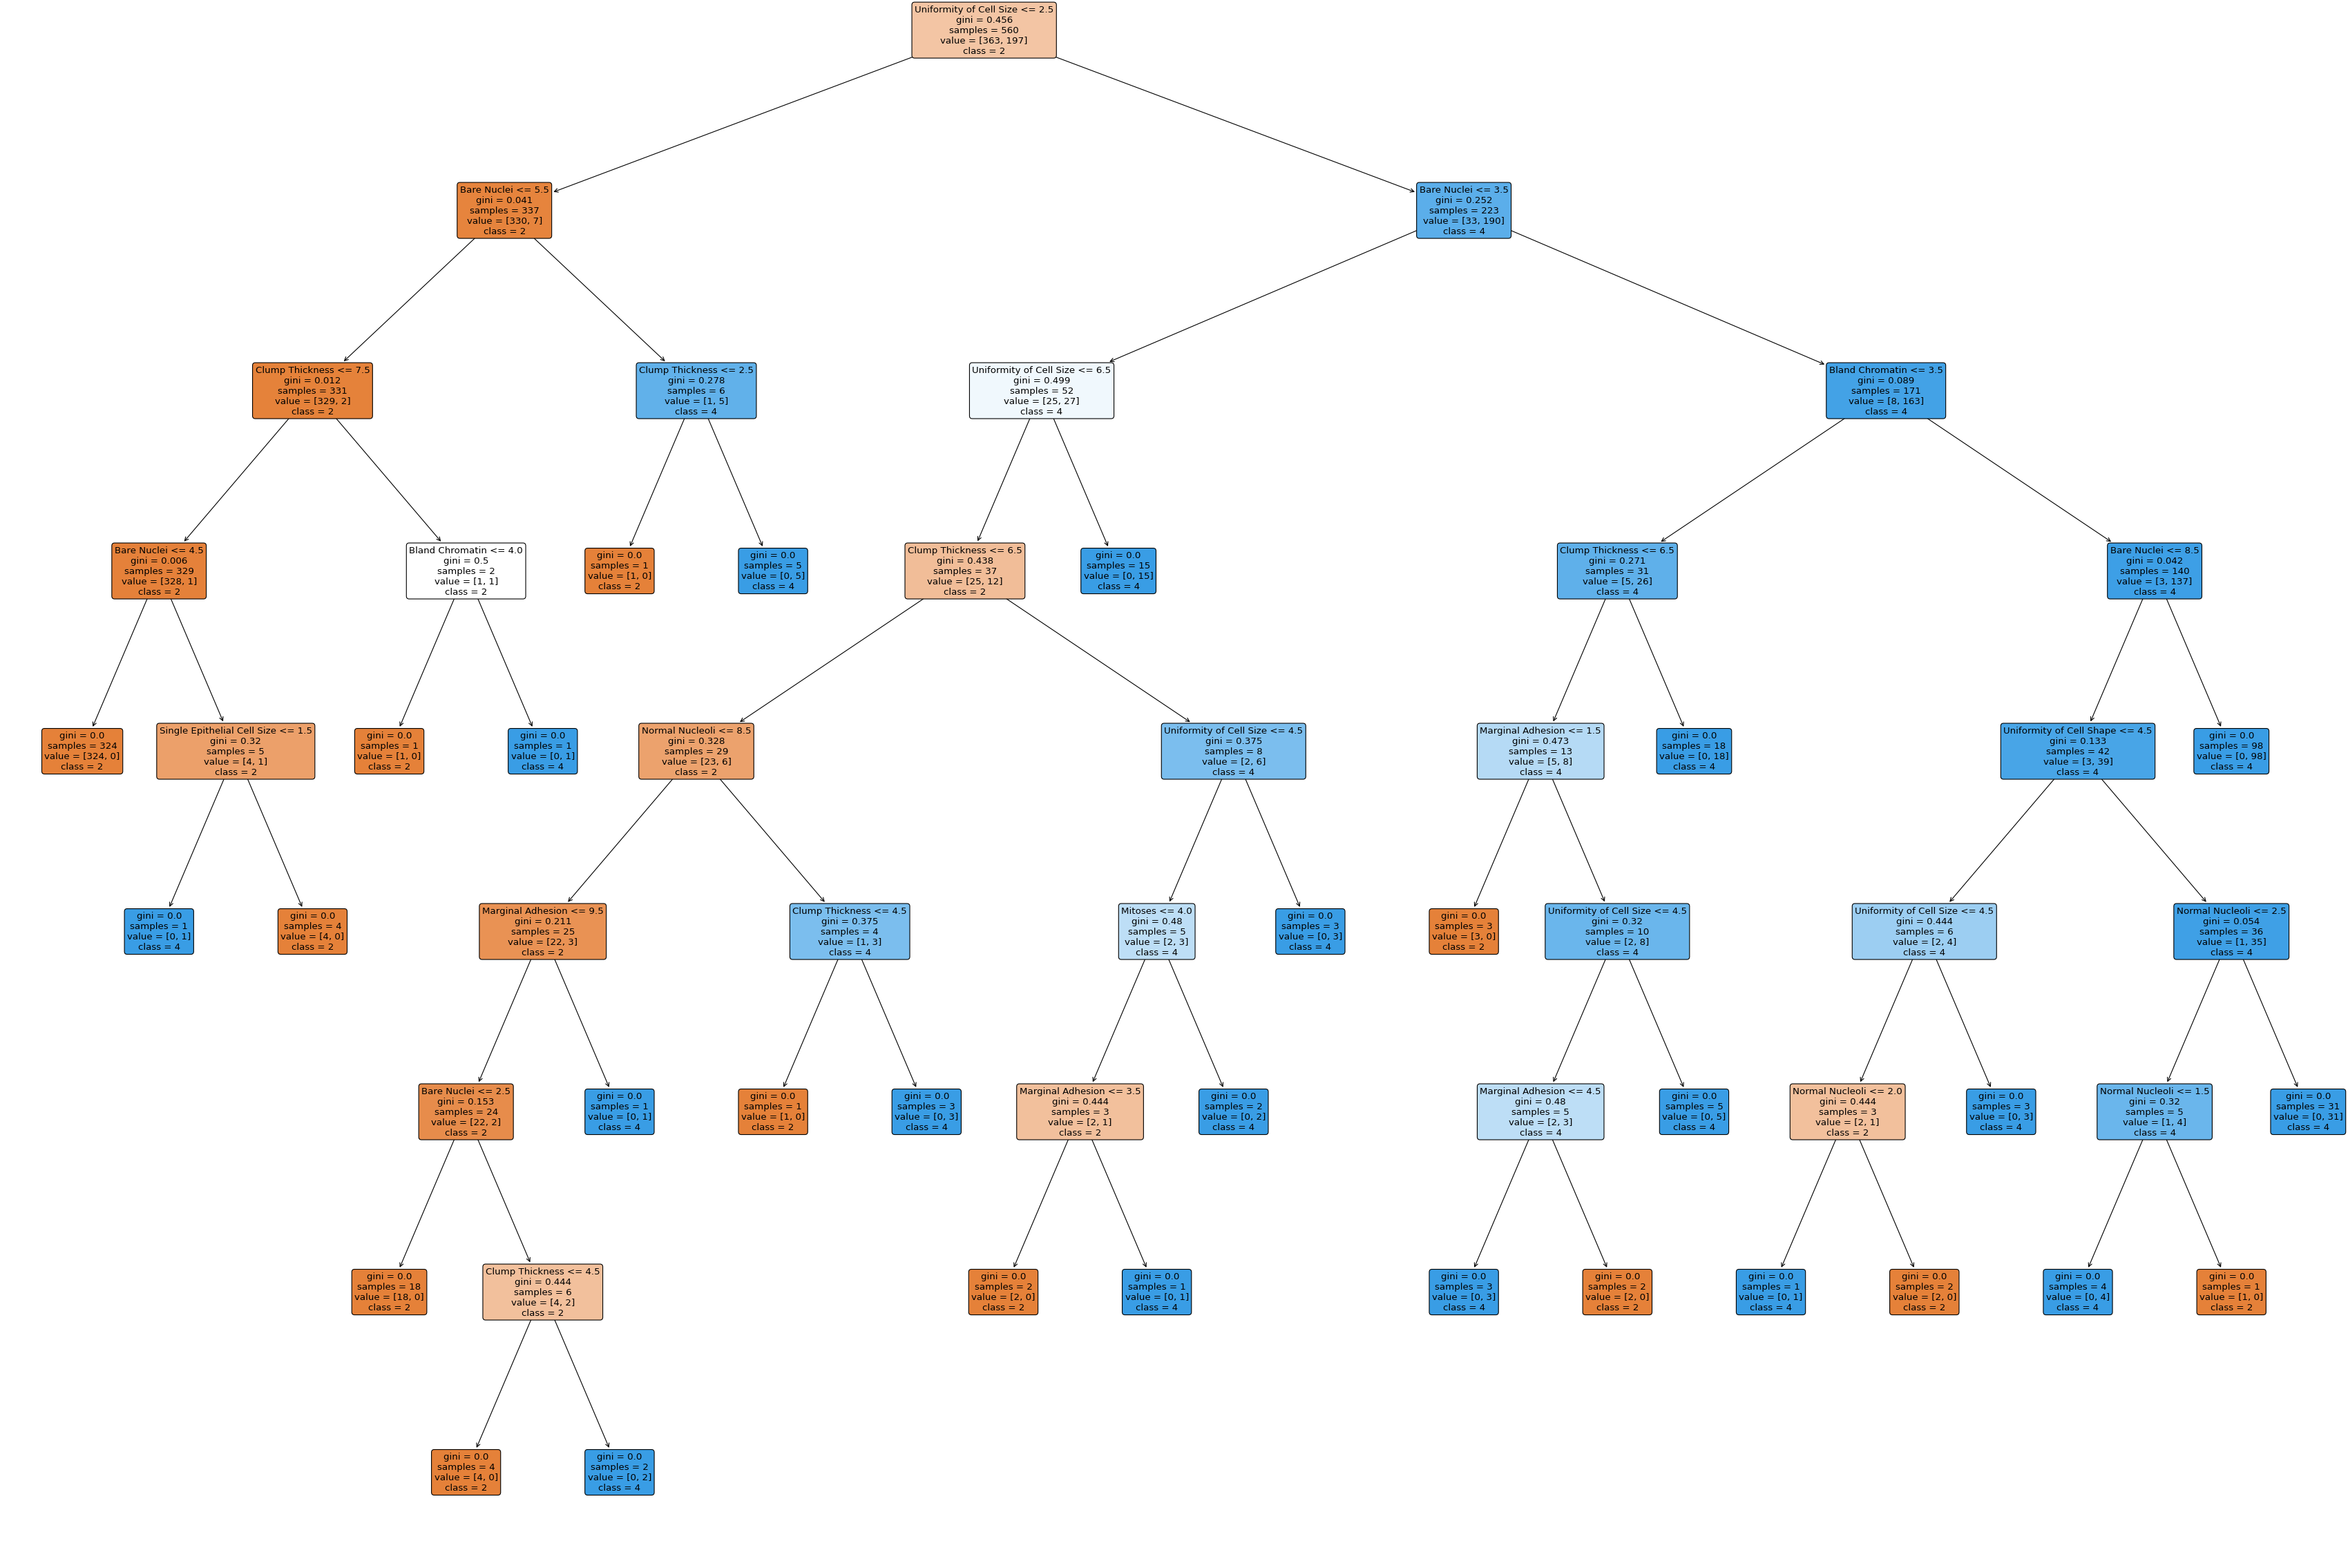

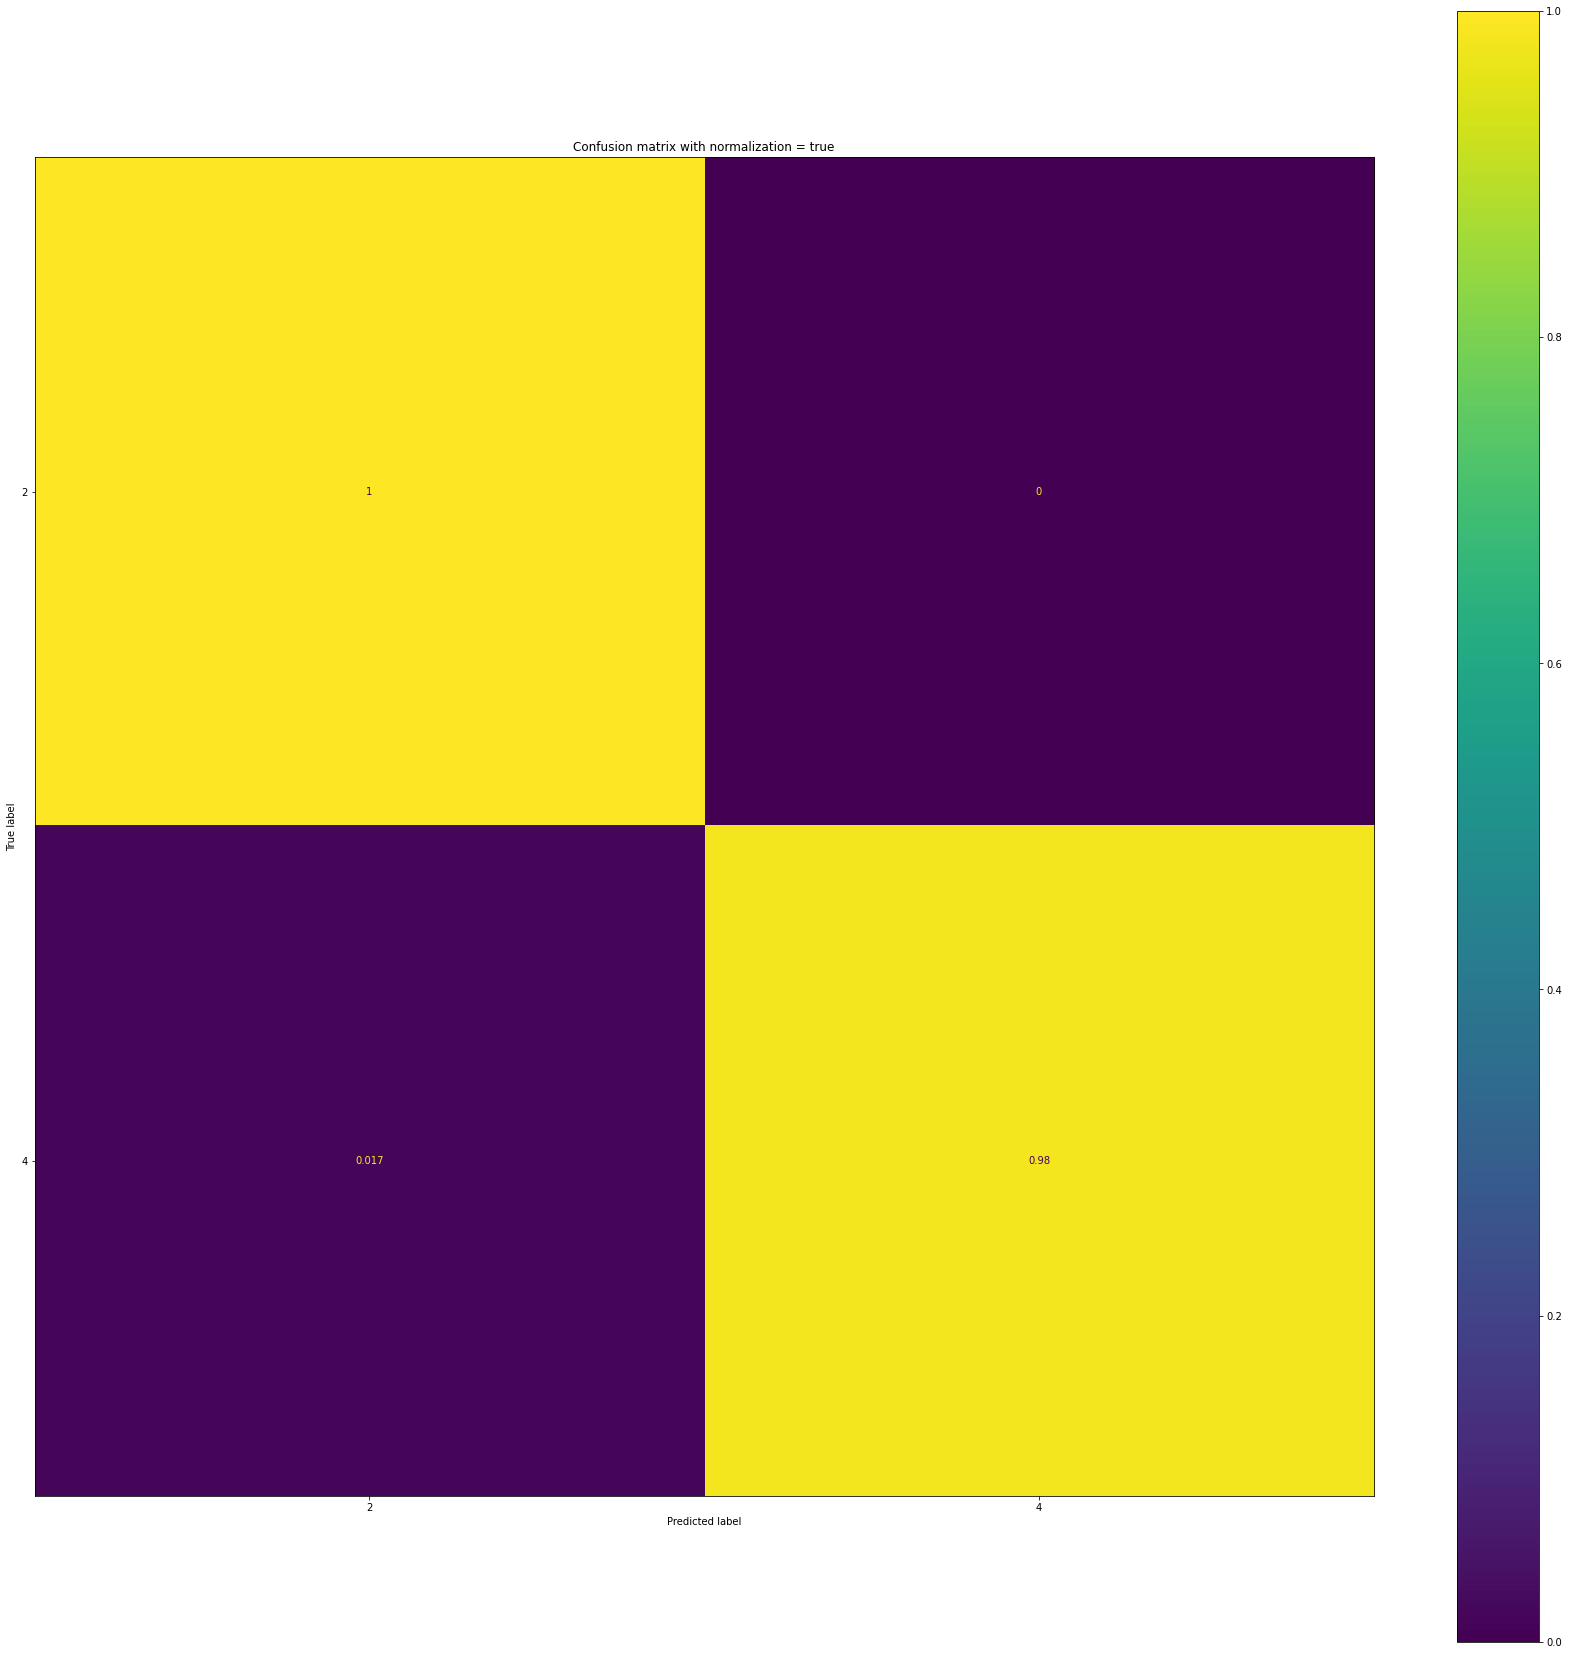

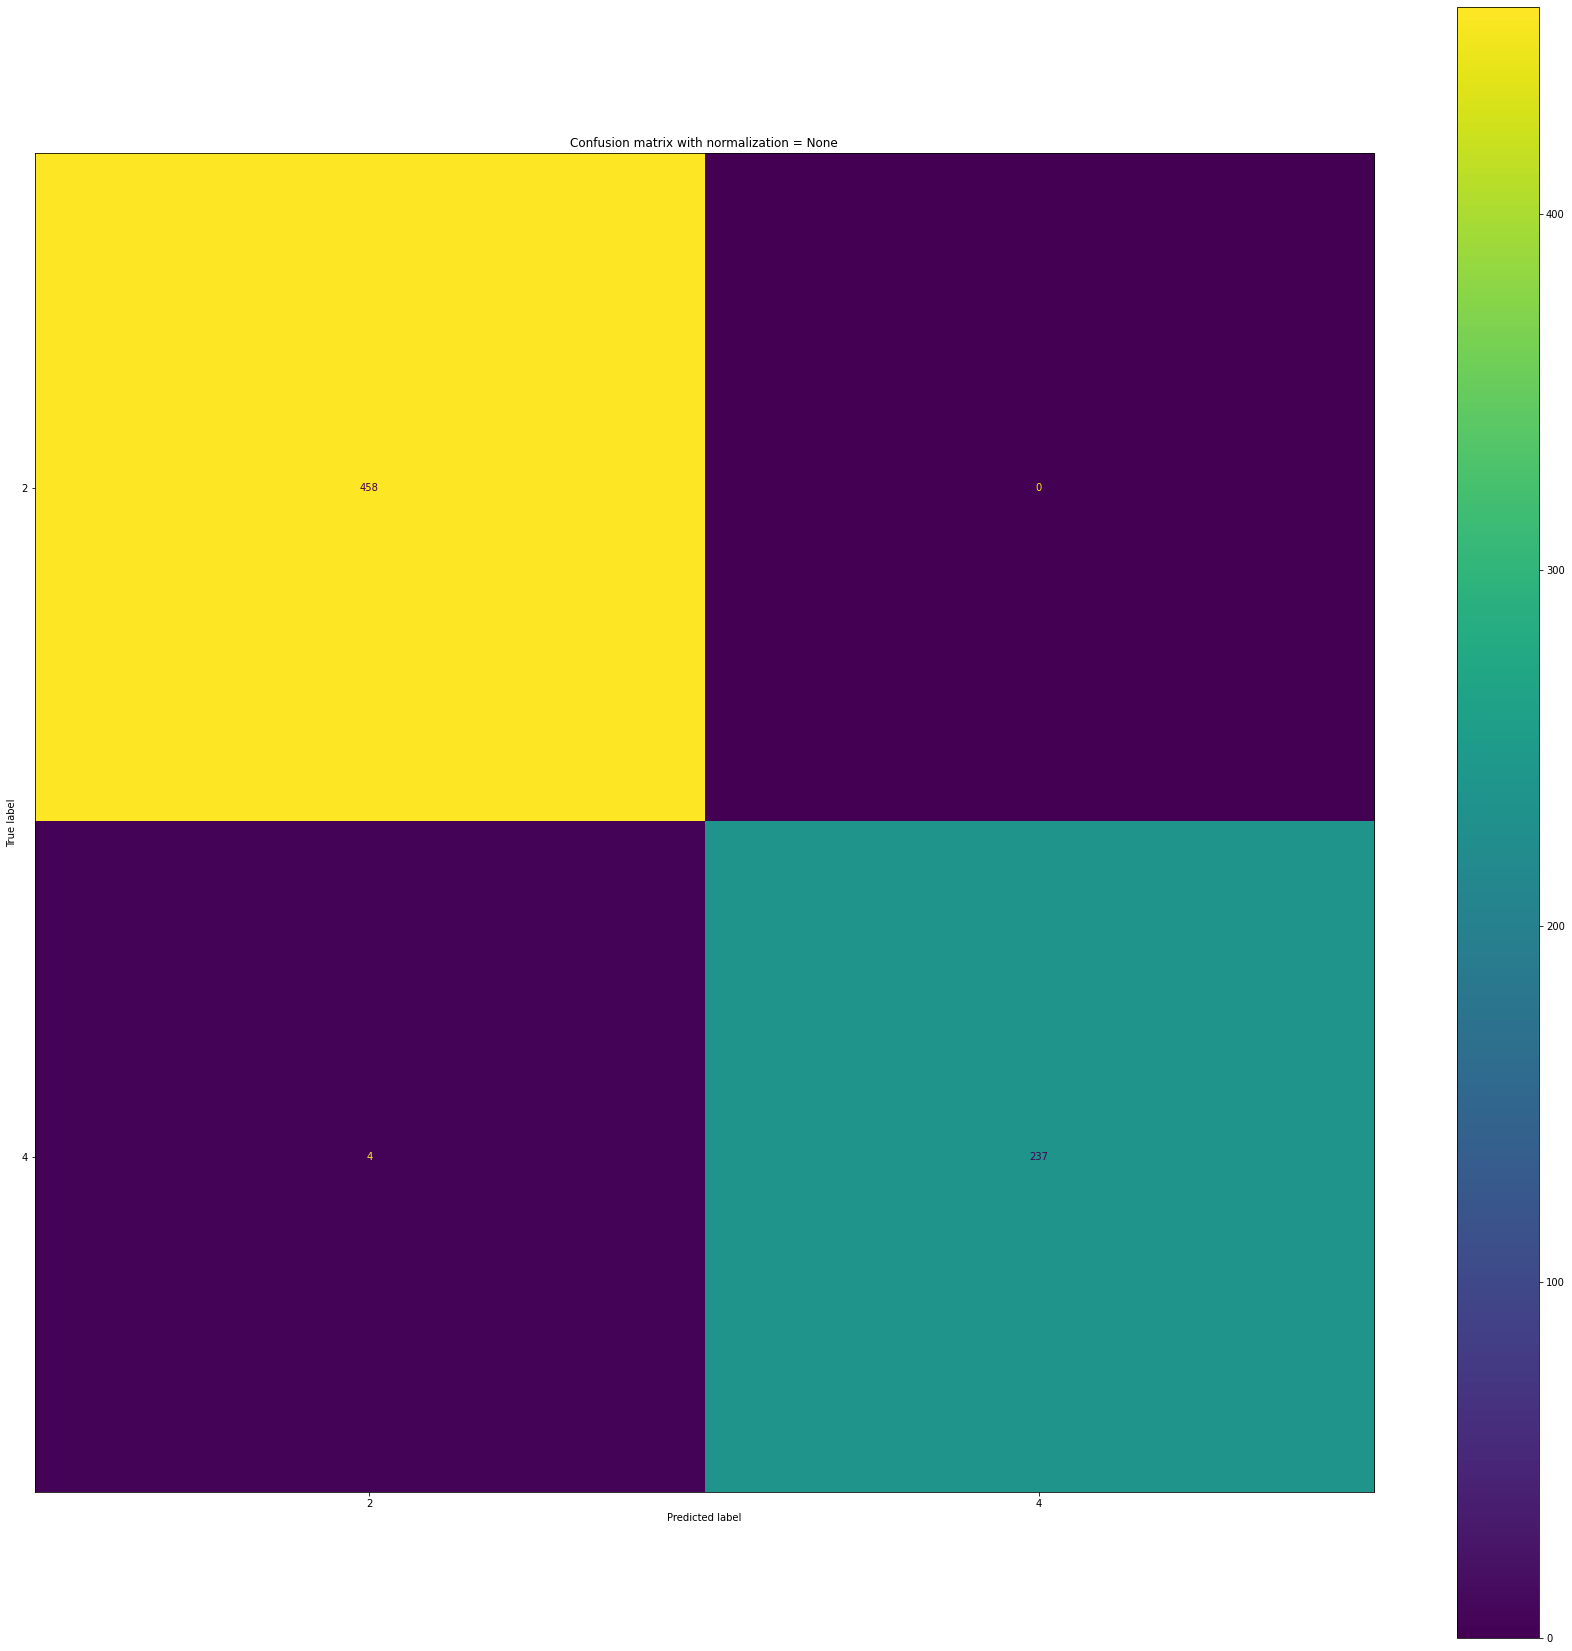

In [20]:
from pandas.plotting import scatter_matrix
%env PYTHONBREAKPOINT=0
#x = tree.plot_tree(clf,feature_names=features,class_names=labels.astype(str),rounded=True,filled=True) 
#now you have to fit k models using the various splits
#after showing that there is isn't much sampling skew you can cross validate this way and choose a tree closest to the 
#mean value above or take a worst case
#note the splitting of folds occurs by randomly, use random state for reproducible results
#define a dataframe to store all the models
models = pd.DataFrame(columns=["score","model"])
breakpoint()
#loop over all possible models
from sklearn.model_selection import KFold
#shuffle reorders the data for less bias and changes the cross val score from above
kf = KFold(n_splits = k, shuffle = True, random_state = 0)
i=0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train = X.iloc[train_index]
    x_test = X.iloc[test_index]
    y_train = Y.iloc[train_index]
    y_test= Y.iloc[test_index]
    
    #train the model
    model = clf.fit(x_train,y_train)
    predictions = clf.predict(x_test)
    print("model score = ",model.score(x_test,y_test))
    
    #print('Scores from each Iteration: ', scores)
    print('Average K-Fold Score :' , np.mean(scores)) 
    plt.figure()
    #x = tree.plot_tree(model,rounded=True,filled=True,class_names=sorted,feature_names=features)
    from matplotlib.pyplot import figure
    #width,length
    figure(figsize=(50, 35), dpi=80)
    x = tree.plot_tree(clf,rounded=True,filled=True,class_names=sorted,feature_names=features,fontsize=12) 
   # plt.savefig('tree_high_dpi'+str(i), format='eps',bbox_inches = "tight")
    #assign model to dataframe
    models.loc[i] = [model.score(x_test,y_test),model]
    #clf = model
    #increment index in dataframe
    i = i+1
    
    #plot the confusion matrices 1 for normalzied the other un-normalized
    values = ['true',None]
    #cmap='cividis'
    for x in values:
        disp = matrix(clf,X,Y,display_labels=sorted,normalize=x)
        disp.ax_.set_title("Confusion matrix with normalization = "+str(x))
    print(disp.confusion_matrix)